# BUSSINESS CASE : To predict the automobile price using machine learning.

### It is the regression task where we are goint to predict the price of the automobile.

In [1]:
# Importion all the necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
# Loading the dataset.
df = pd.read_csv('Auto_imports.csv',header = None)
df.head()

0    1            2    3    4     5            6    7      8     9      10  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  171.2   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  176.6   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  176.6   

     11    12    13    14    15   16    17    18    19    20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154  5000  19   
3  66.2  54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102  5500  24   
4  66.4  54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115  5500  18   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
3  30  13950  
4  22  17450

* Here we can see that our dataset do not have column name so we will change the name of the column.

In [3]:
# Changing the column name.
df.set_axis(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'], axis=1, inplace= True)

In [4]:
# Checking column name.
df.head(2) 

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   

   price  
0  13495  
1  16500

## Basic Check :

In [5]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

* We can see '?' in the data which are nothing but missing values.

In [6]:
df.tail()

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
196         -1                95  volvo       gas        std         four   
197         -1                95  volvo       gas      turbo         four   
198         -1                95  volvo       gas        std         four   
199         -1                95  volvo    diesel      turbo         four   
200         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
196      sedan          rwd           front       109.1   188.8   68.9   
197      sedan          rwd           front       109.1   188.8   68.8   
198      sedan          rwd           front       109.1   188.8   68.9   
199      sedan          rwd           front       109.1   188.8   68.9   
200      sedan          rwd           front       109.1   188.8   68.9   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
196    55.5         2952         ohc             four          141   
197    55.5         3049         ohc             four          141   
198    55.5         3012        ohcv              six          173   
199    55.5         3217         ohc              six          145   
200    55.5         3062         ohc             four          141   

    fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
196        mpfi  3.78   3.15                9.5        114     5400        23   
197        mpfi  3.78   3.15                8.7        160     5300        19   
198        mpfi  3.58   2.87                8.8        134     5500        18   
199         idi  3.01   3.40               23.0        106     4800        26   
200        mpfi  3.78   3.15                9.5        114     5400        19   

     highway-mpg  price  
196           28  16845  
197           25  19045  
198           23  21485  
199           27  22470  
200           25  22625

In [7]:
df.describe()

symboling  wheel-base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   201.000000   201.000000         201.000000  201.000000   201.000000   
mean   2555.666667   126.875622          10.164279   25.179104    30.686567   
std     517.296727    41.546834           4.004965    6.423220     6.815150   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2169.000000    98.000000           8.600000   19.000000    25.000000   
50%    2414.000000   120.000000           9.000000   24.000000    30.000000   
75%    2926.000000   141.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

## Insight :
* as we can see here the minimum record observed in the symboling is -2 and maximum is 3 with std of 1.25.
* lengthwise the longest car have observation 208.10 and shortest have 141.10.
* minimum curb-weight for car is 1488 and maximum is 4066.
* The size of an engine ranges between 61 to 326 with standard deviation of 41.54.
* In city-mpg and highway-mpg minimum value observed is 13 and 16 respectively and maximum is observed is 49 and 54 it means that automobile gives more milege on highway than in city.
* The cheapest automobile sold is of 5118 and the highest value of an automobile is 45400.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## Insight:
* As we can see in head and tail we have ? (Question_mark) those are NaN values present in the data.
* We have categorical features available in the dataset which we needs to handel.

In [9]:
# Converting " ? " in NaN value
df.replace('?',np.nan, inplace=True)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
196         -1                95        volvo       gas        std   
197         -1                95        volvo       gas      turbo   
198         -1                95        volvo       gas        std   
199         -1                95        volvo    diesel      turbo   
200         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   
200         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
196   188.8   68.9    55.5         2952         ohc             four   
197   188.8   68.8    55.5         3049         ohc             four   
198   188.8   68.9    55.5         3012        ohcv              six   
199   188.8   68.9    55.5         3217         ohc              six   
200   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            130        mpfi  3.47   2.68                9.0        111   
2            152        mpfi  2.68   3.47                9.0        154   
3            109        mpfi  3.19   3.40               10.0        102   
4            136        mpfi  3.19   3.40                8.0        115   
..           ...         ...   ...    ...                ...        ...   
196          141        mpfi  3.78   3.15                9.5        114   
197          141        mpfi  3.78   3.15                8.7        160   
198          173        mpfi  3.58   2.87                8.8        134   
199          145         idi  3.01   3.40               23.0        106   
200          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  13495  
1       5000        21           27  16500  
2       5000        19           26  16500  
3       5500        24           30  13950  
4       5500        18           22  17450  
..       ...       ...          ...    ...  
196     5400        23           28  16845  
197     5300        19           25  19045  
198     5500        18           23  21485  
199     4800        26           27  22470  
200     5400  

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

* Here we can see that we have missing values in the data. we will handle these values in the data pre-processing stage.

# Exploratory Data Analysis:

## Domain Analysis :-

1. symboling:- it is the risk measure of a car if it is less the car is less risky and if it is more the car is more risky.
2. normalized-loss :- it is the compensation given on the loss of vechicle.
3. make :- Different manufacturer of the cars.
4. fuel_type :- The type of fuel used by the car.
5. aspiration :- aspiration includes the type of engine which are further differ by the combustion method, std and turbo.
6. num-of-doors :- number of doors of car.
7. Body-style :- Body_style refers to shape and size of the car and these are classified in the different class.
8. Drive-wheel :- They are the wheels who are responsible for the movement of the car.
9. Engine-location :- As the name suggest this tell us the location of the engine, like where the engine is located in the car front or rear(back).
10. Wheel-Base :- this is the distance between front wheel and rear wheel.
11. length :- length of the vechicle.
12. width :- width of the vechicle.
13. height:- height of the car.
14. curb-weight :- It is the weight of the car without the passanger, the default accessories weight is included in this weight.
15. Engine-type :- These are various types of engines which are used in the car. such as ohc, ohcf, ohcv, dohc, l, rotor.
16. num-of-cylinders :- number of cylinders in car.
17. Engine-size :- It is the volume of fuel and air that can be pushed through a car's cylinder, measured in cubic cm and size measured in liters.
18. fuel-system :- Fuel system means the metod of injection of fuel in the engine.
19. Bore :- Bore is the inner diameter of the cylinder.
20. stroke :- up and down movement of the piston is known as stroke. One stroke consists of one up and one down movement of the piston.
21. compression-ratio :- The ratio of the volume of the cylinder and its head space. when the piston is at the bottom of its stroke to the volume of the head space when the piston is at the top of its travel.
22. horsepower :- The power an engine produces.
23. peak - rpm :- rpm stands for revolutions per minute. peak rpm is the highest rpm of a car.
24. city-mpg :- mpg means mileage per gallon, it is the measure to calculate the distance traveled by the vechicle in the fuel. city mpg signifies the mileage in city.
25. Highway-mpg :- mpg on highway.
26. price :- price of cars.

## Univariate Analysis :

In [11]:
df.head(2)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   

   price  
0  13495  
1  16500

                                             |                                             | [  0%]   00:00 ->…


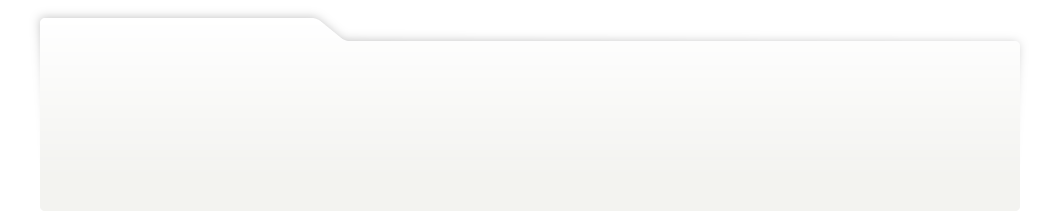
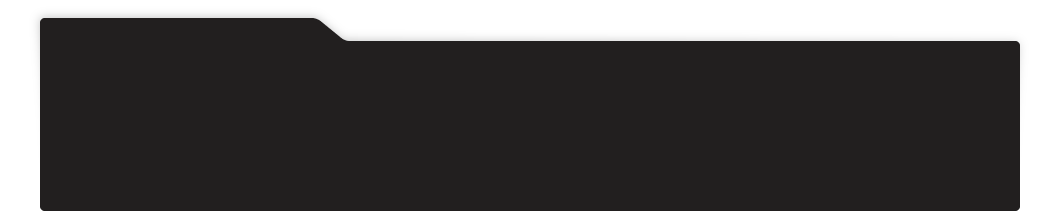
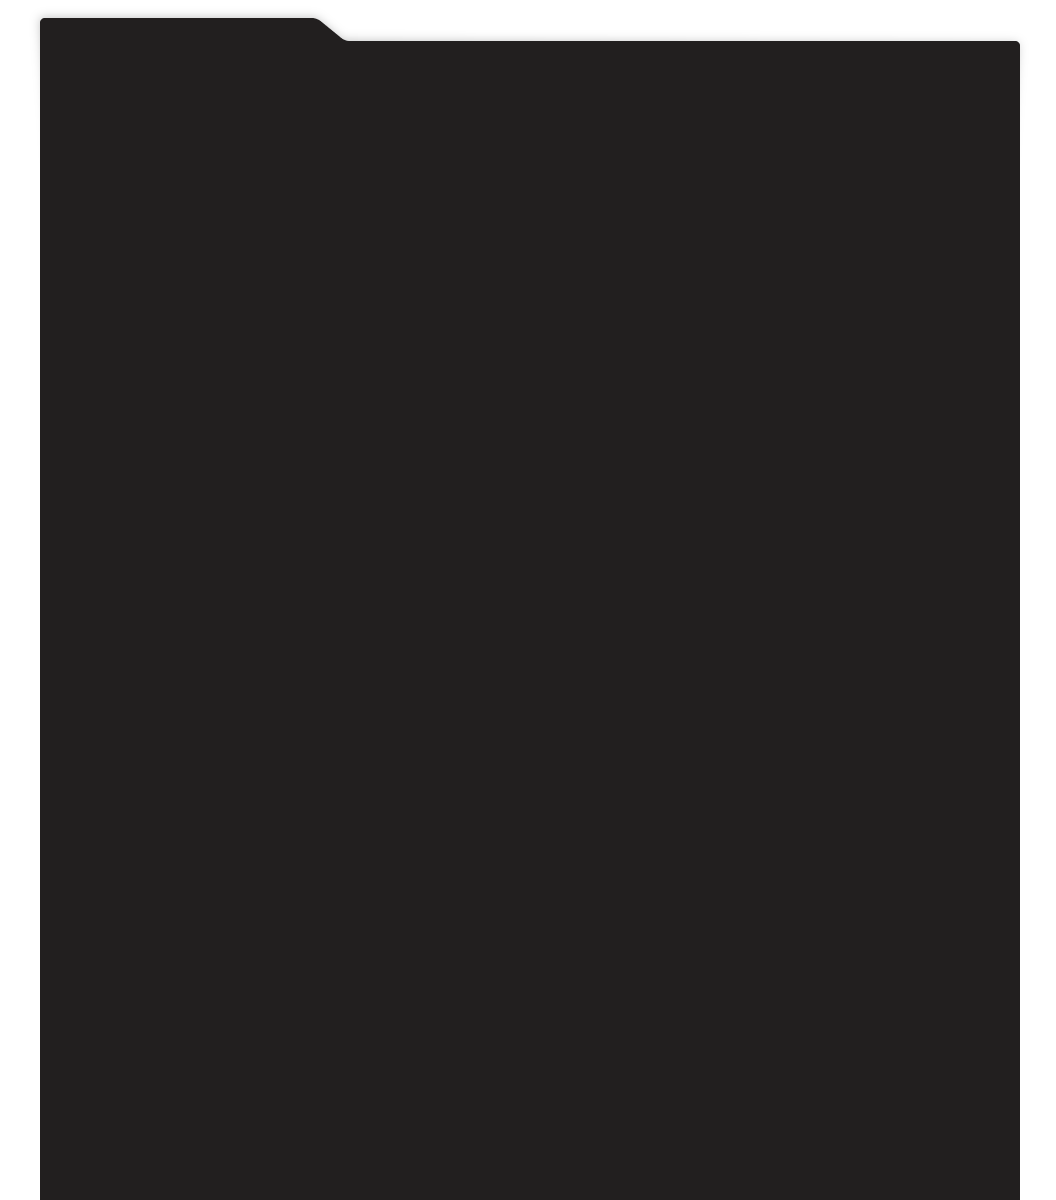
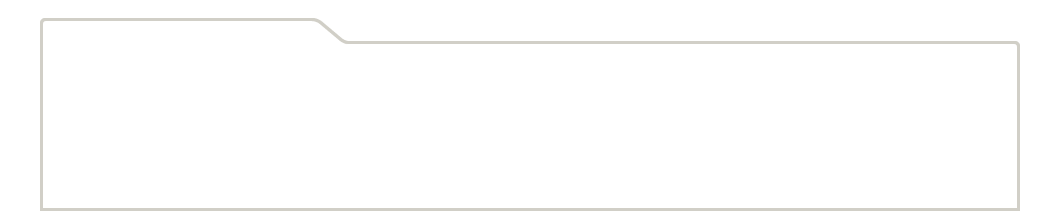
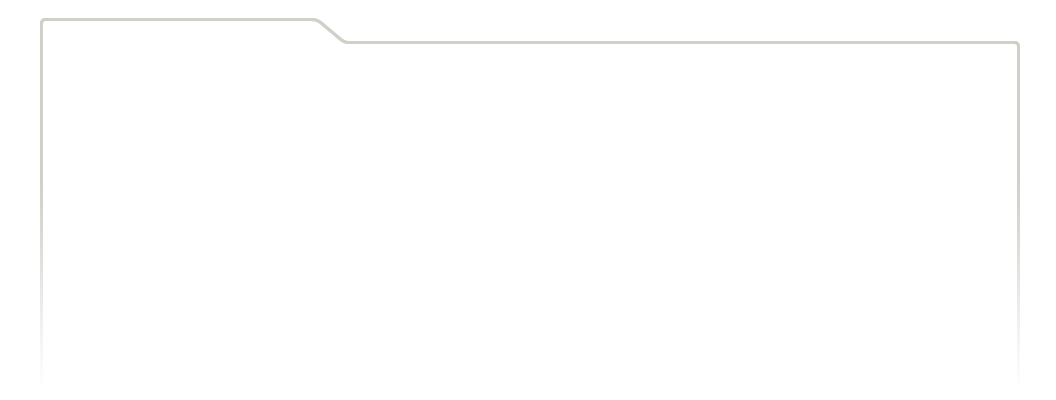
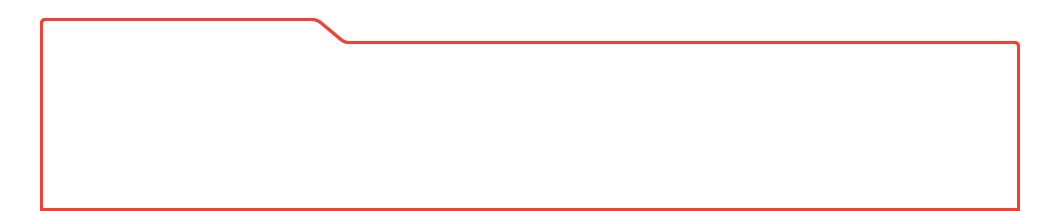
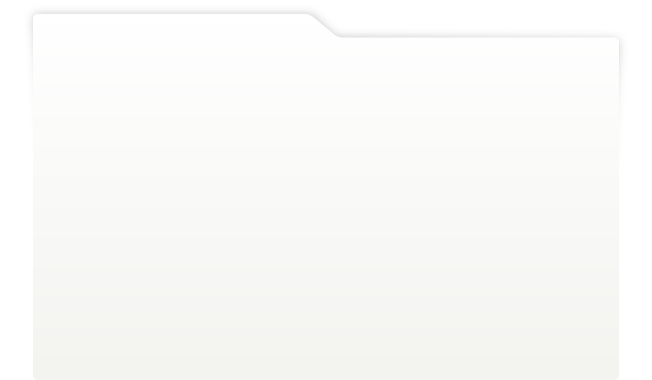
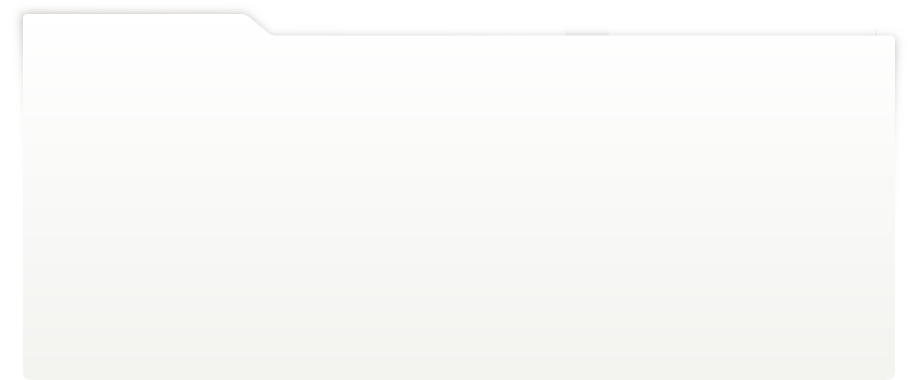
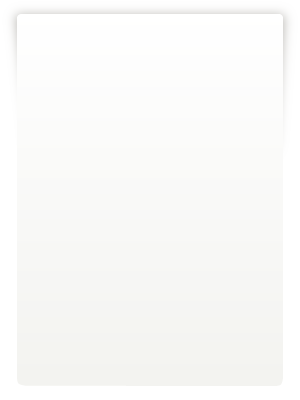
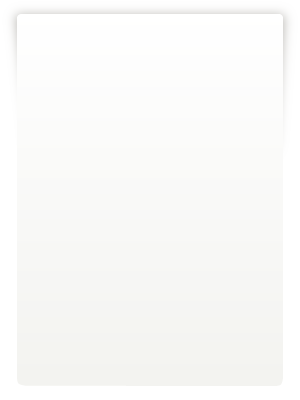
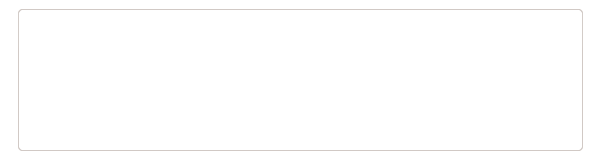
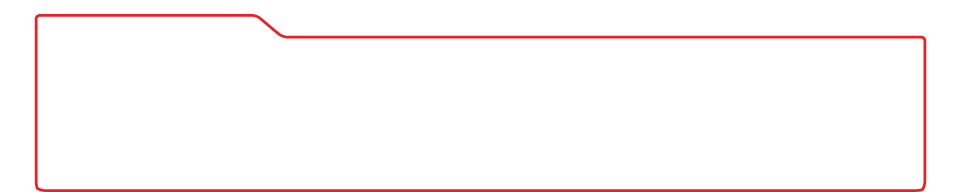
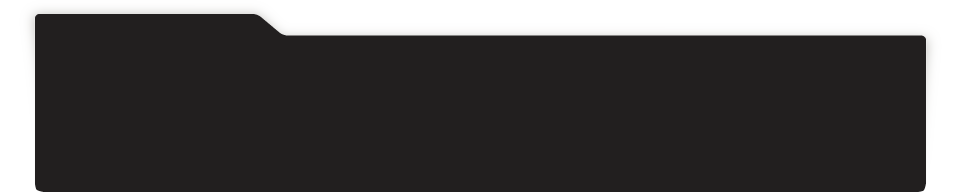
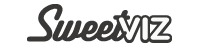
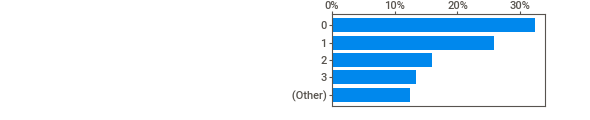
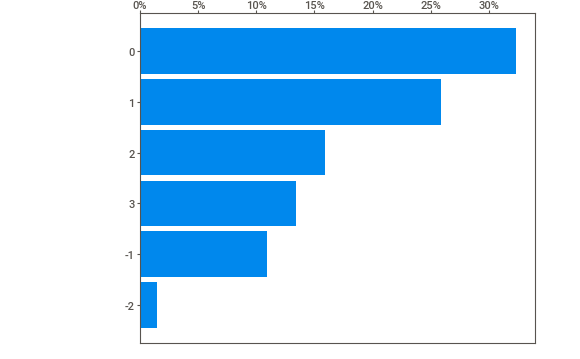
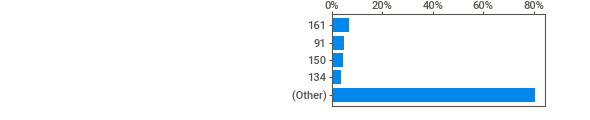
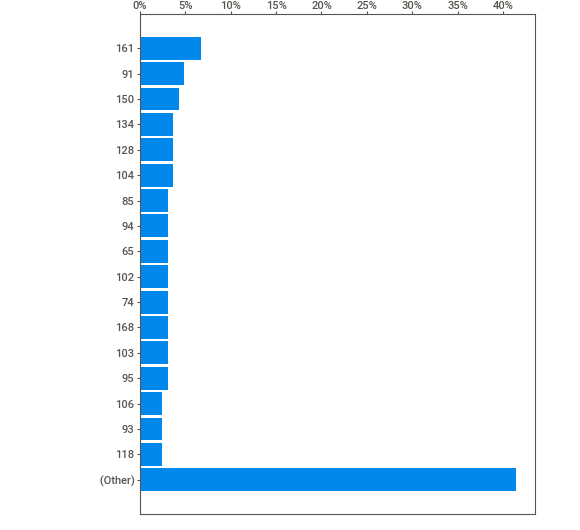
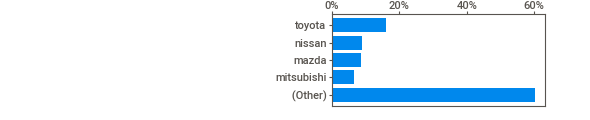
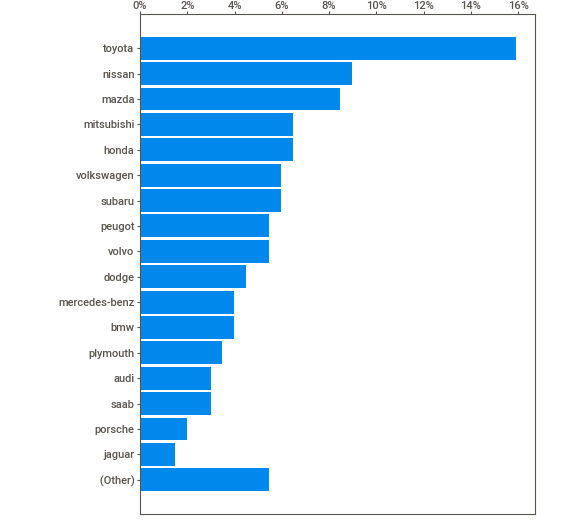
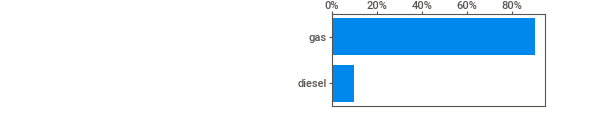
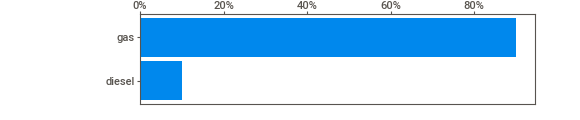
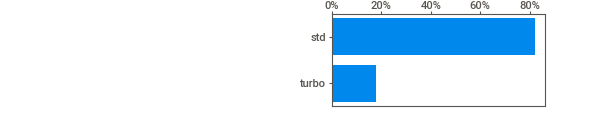
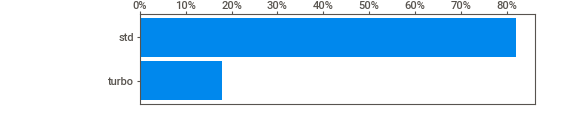
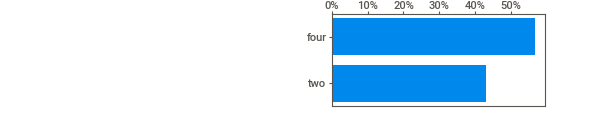
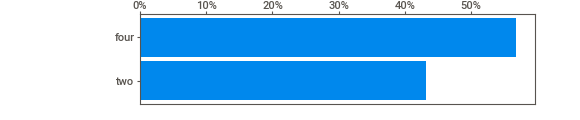
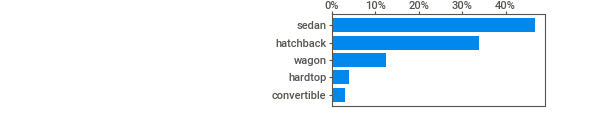
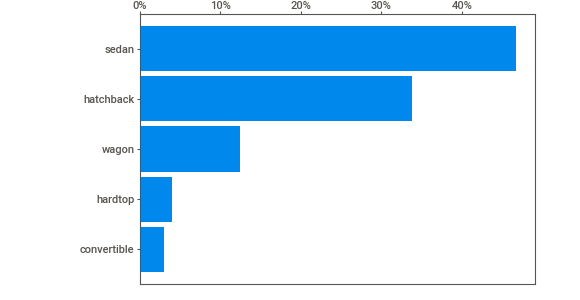
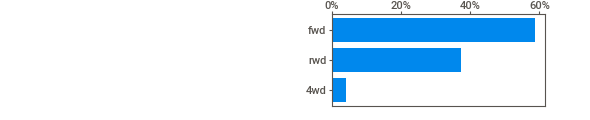
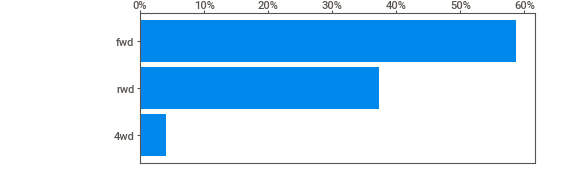
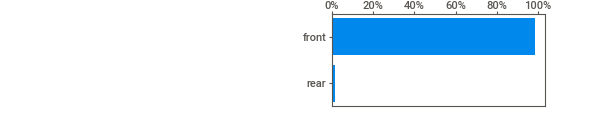
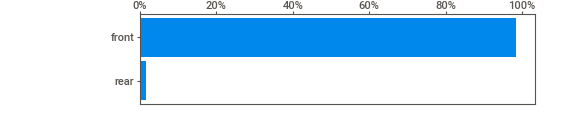
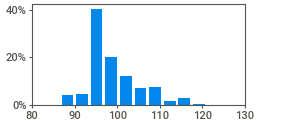
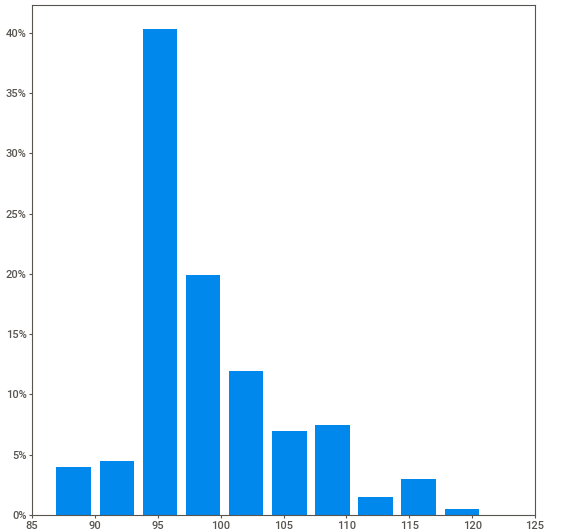
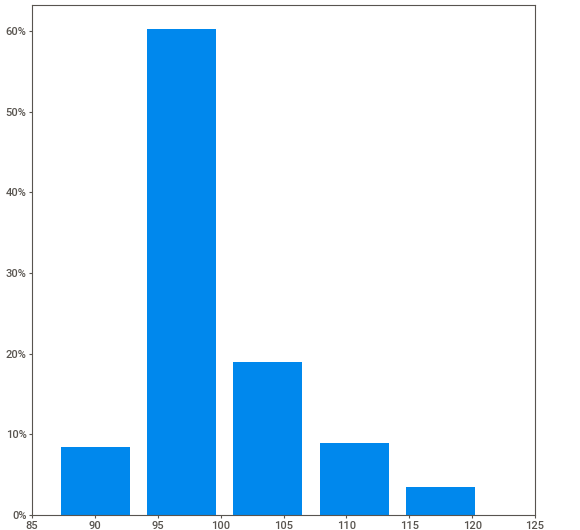
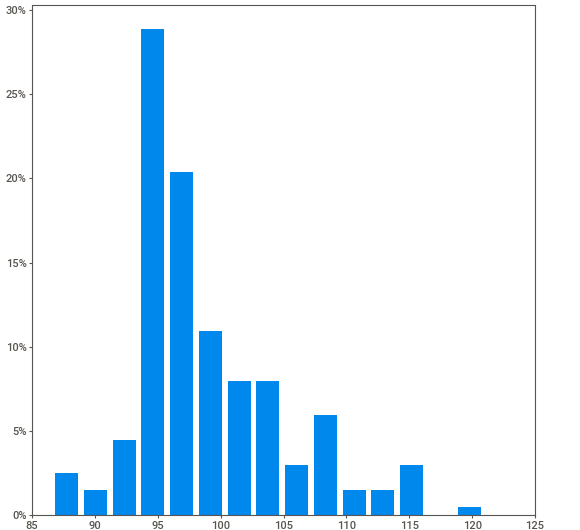
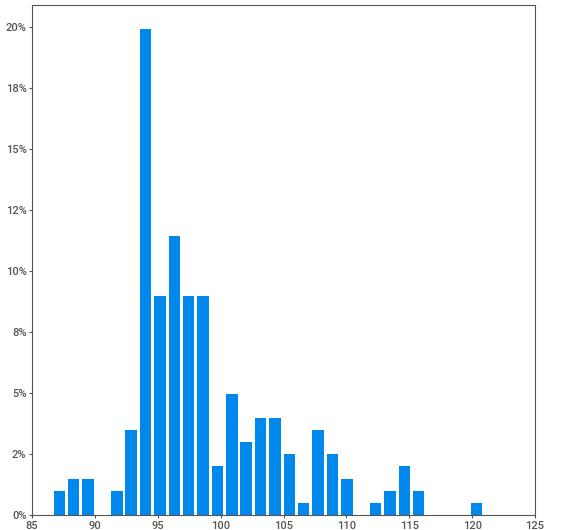
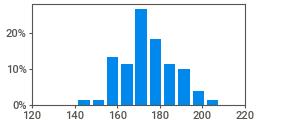
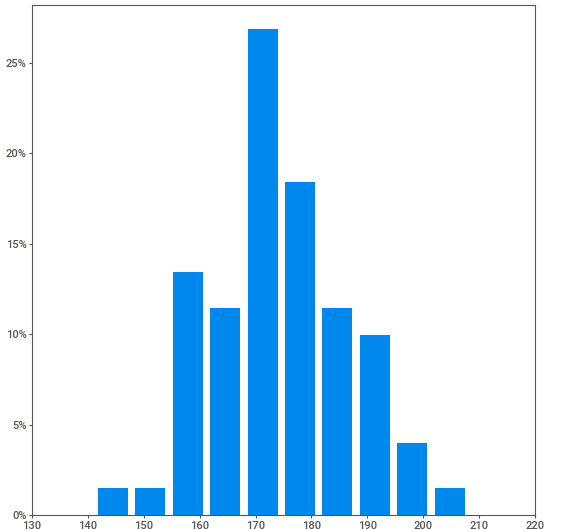
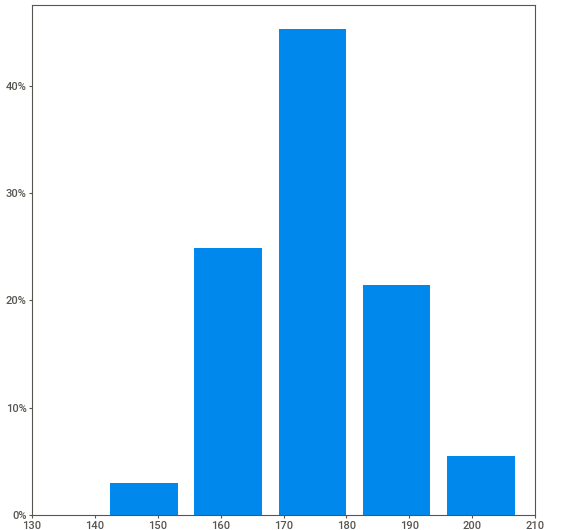
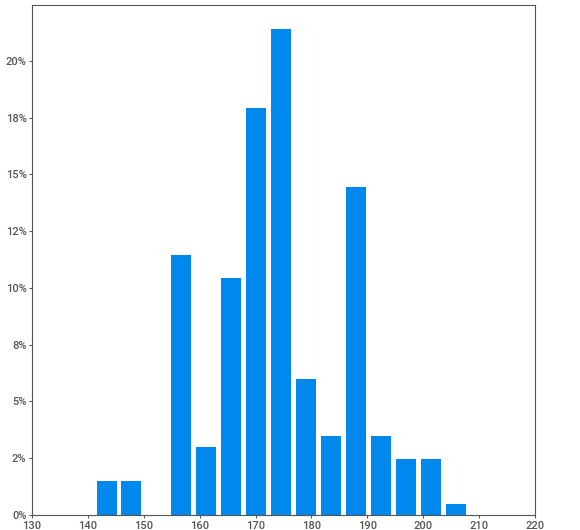
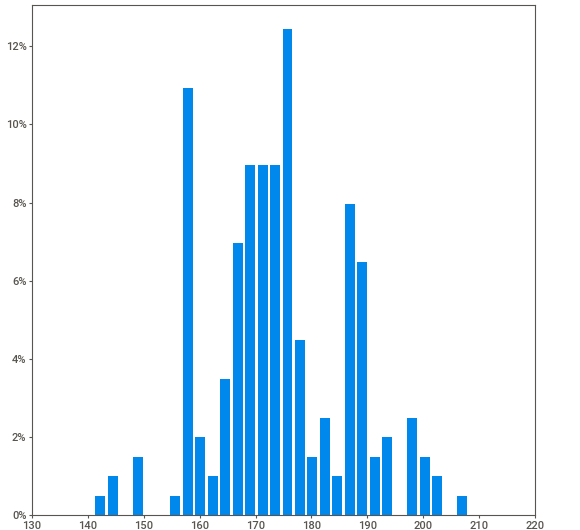
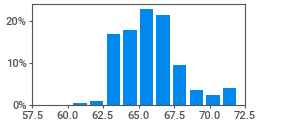
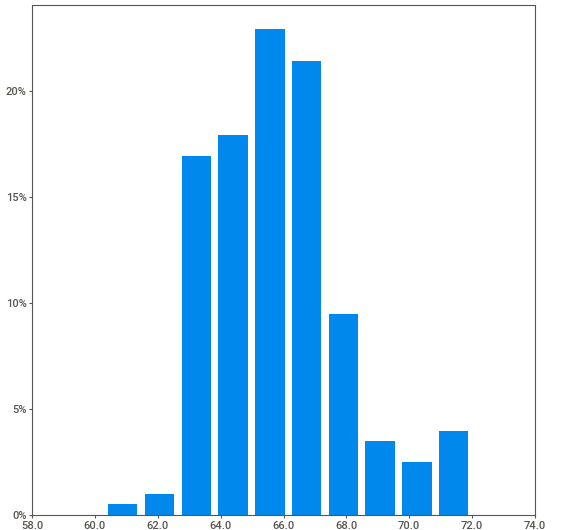
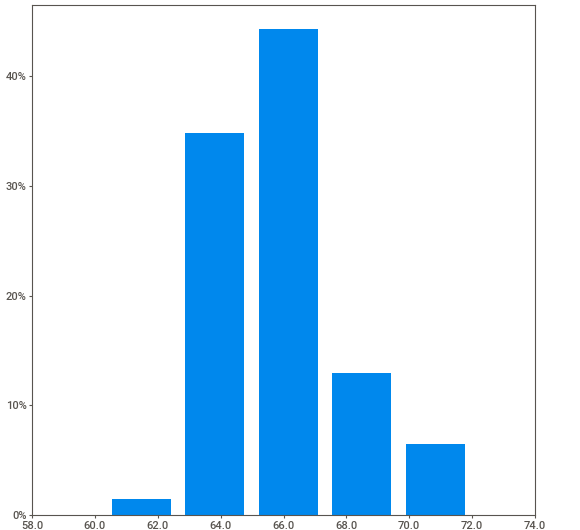
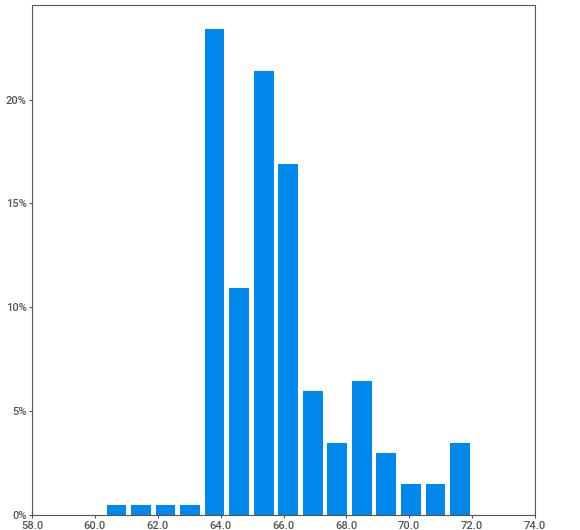
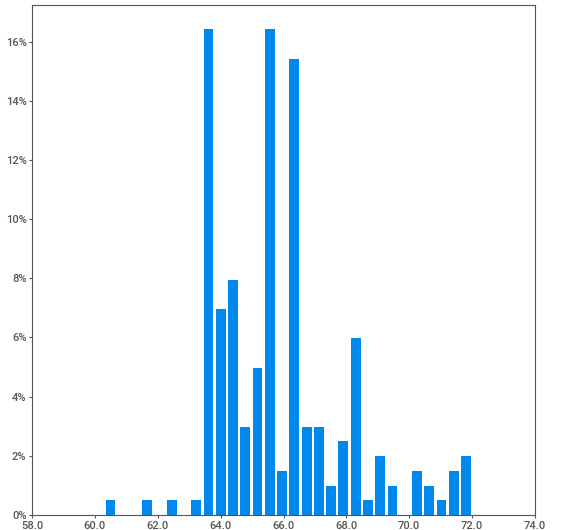
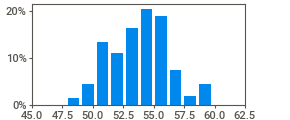
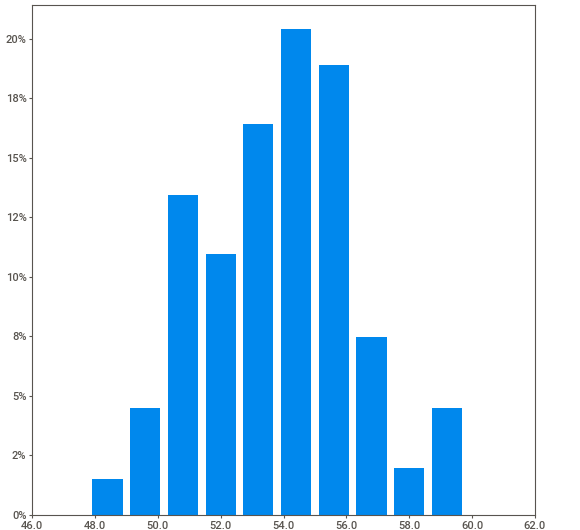
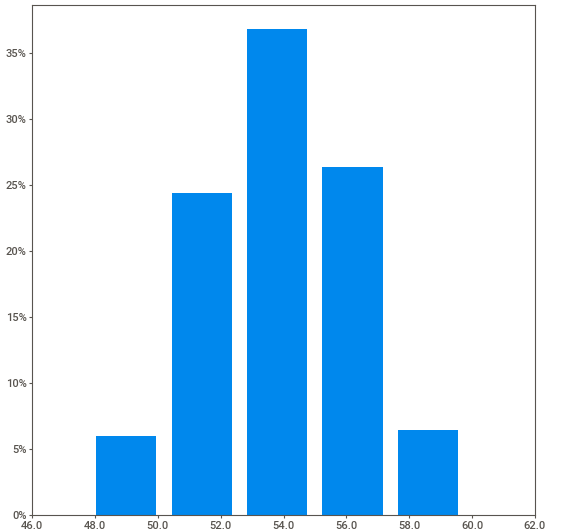
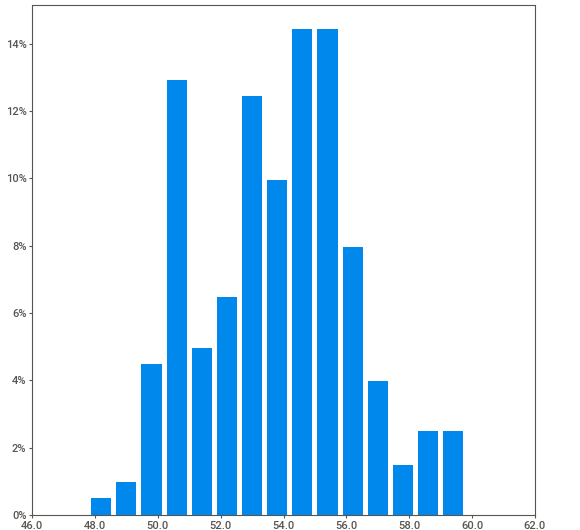
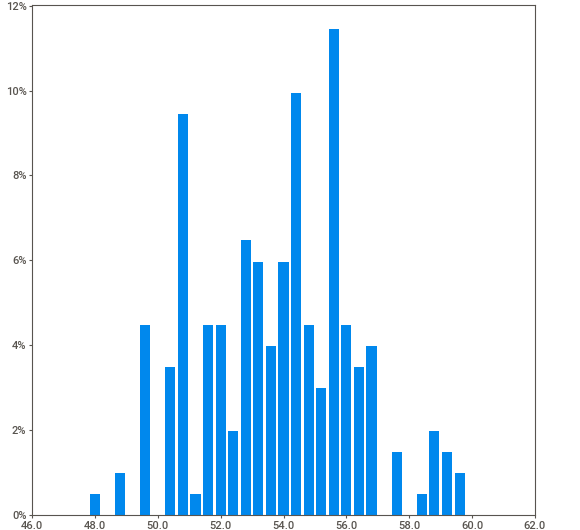
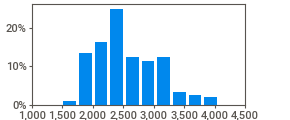
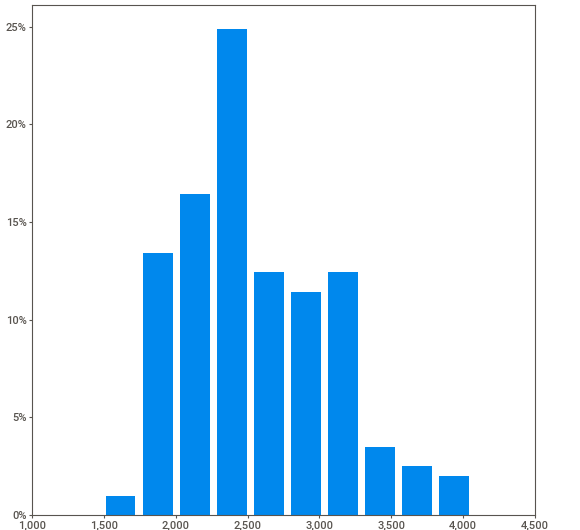
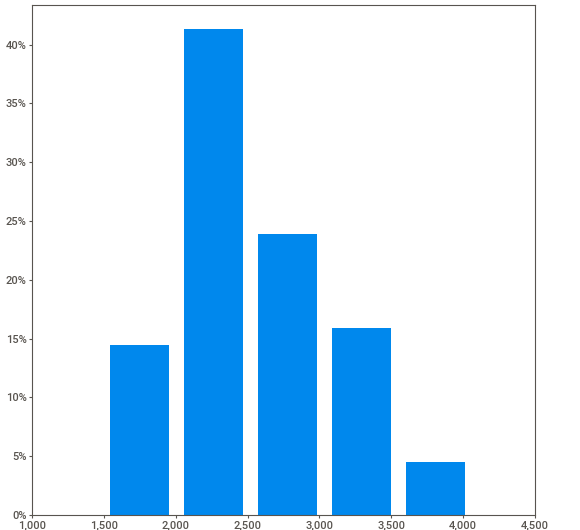
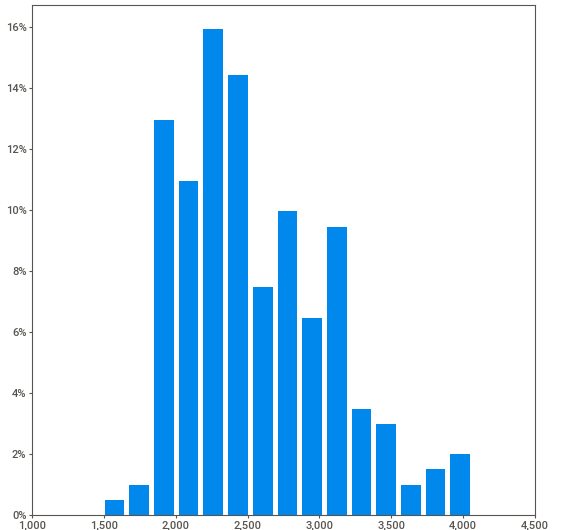
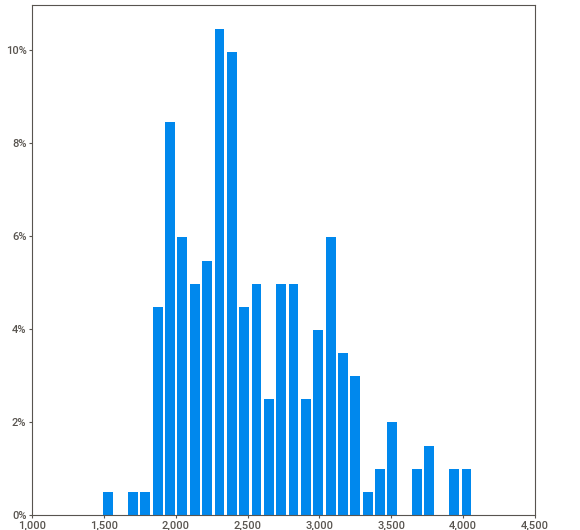
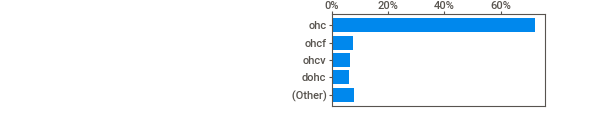
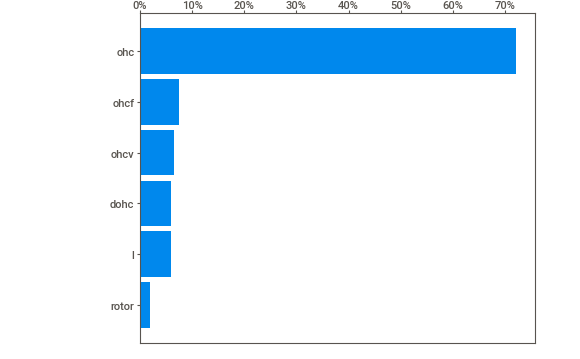
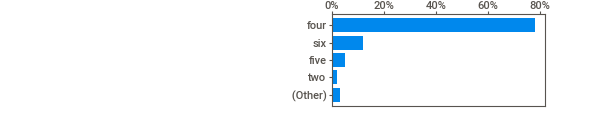
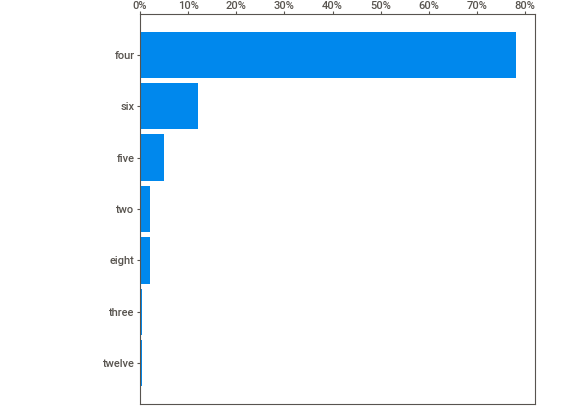
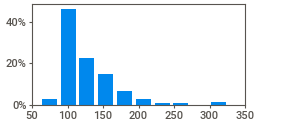
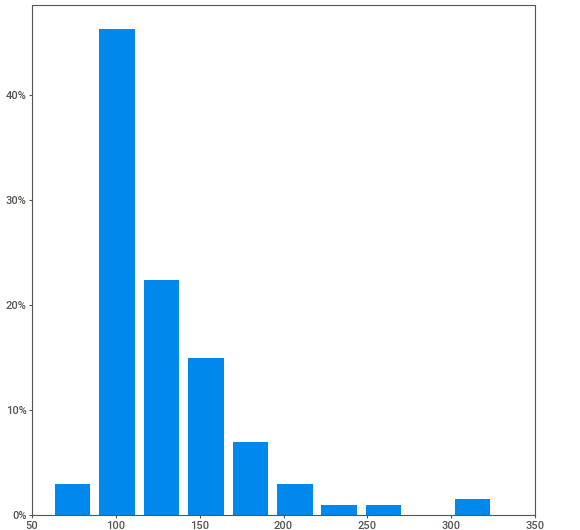
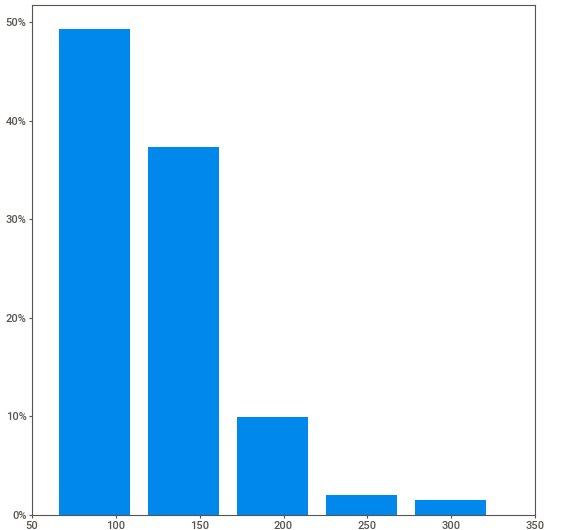
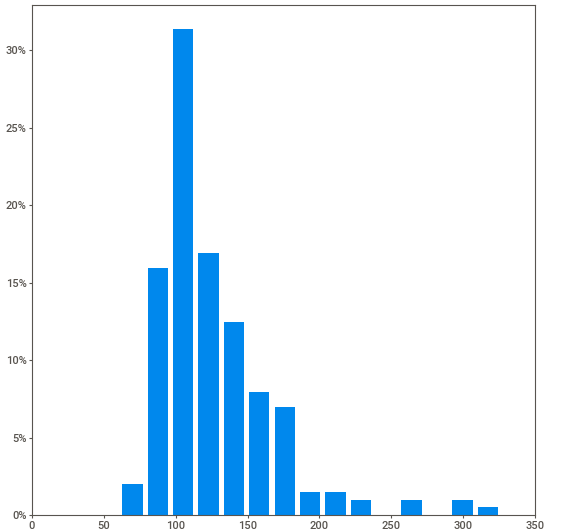
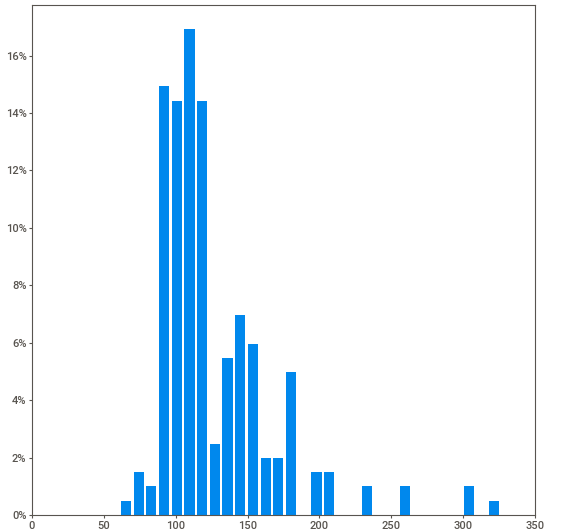
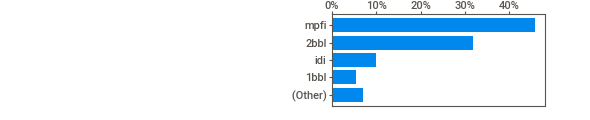
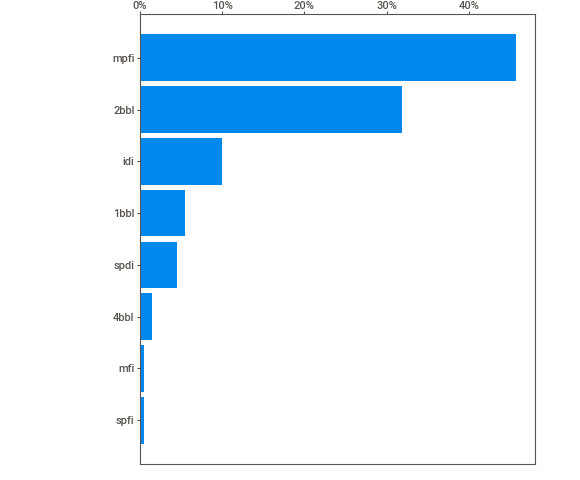
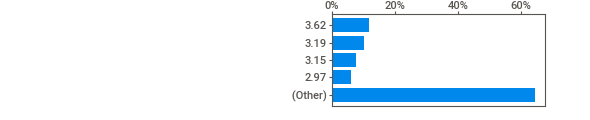
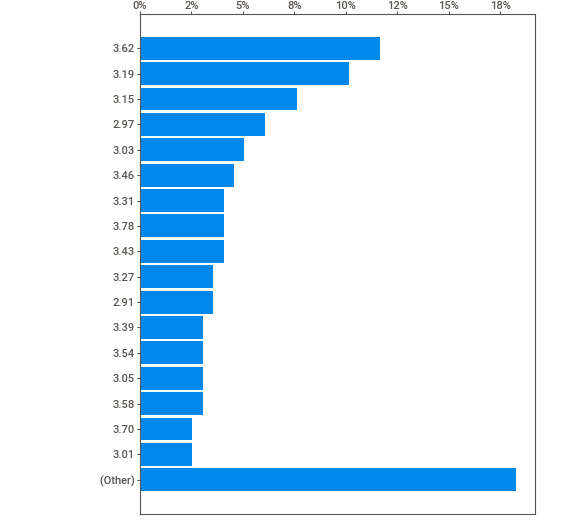
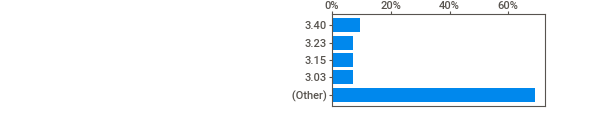
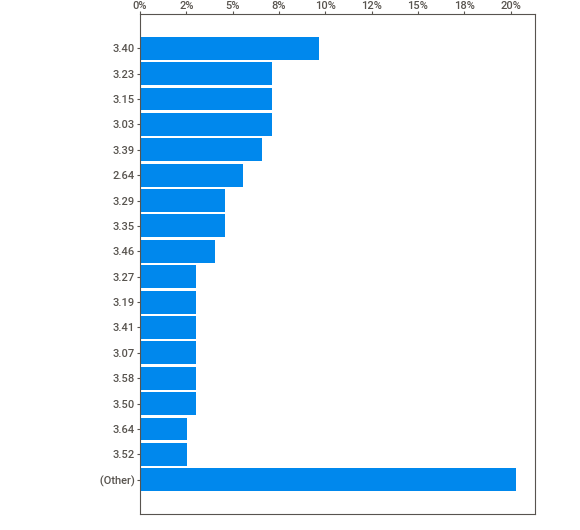
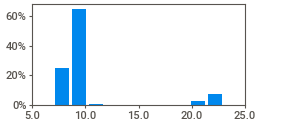
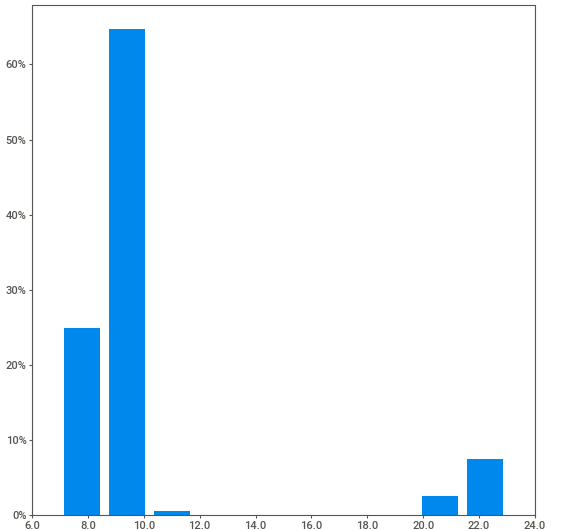
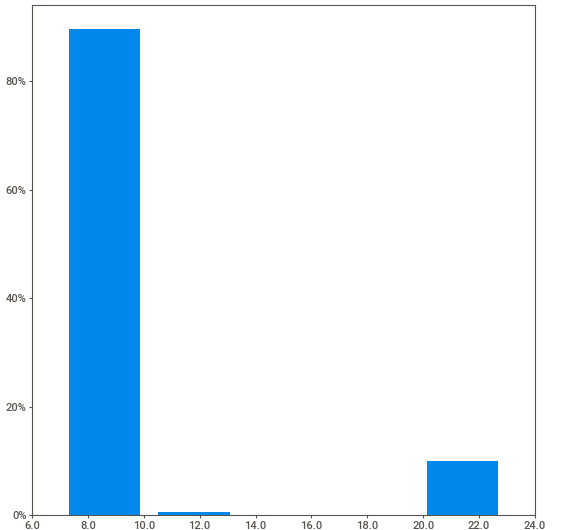
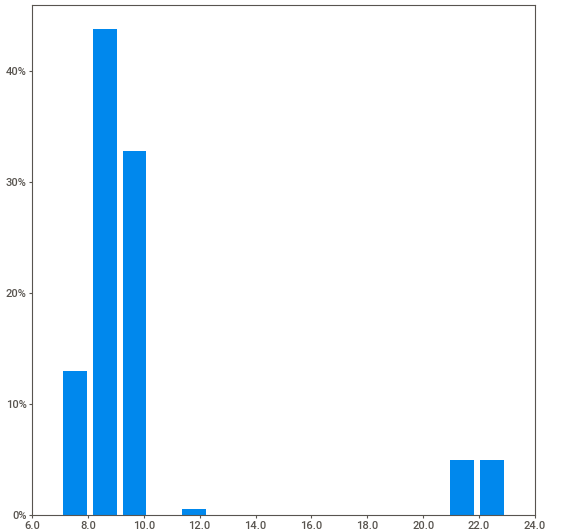
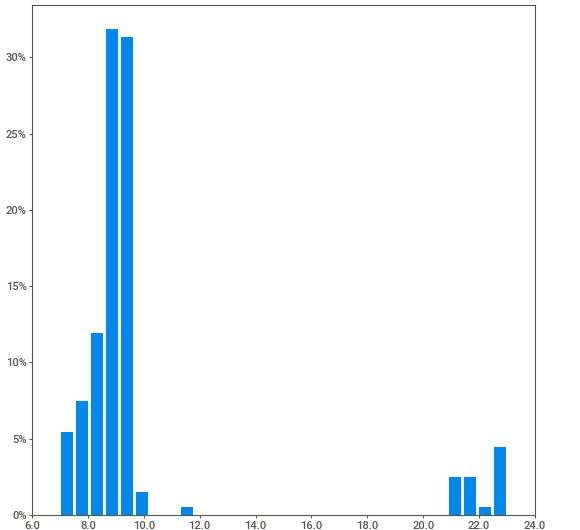
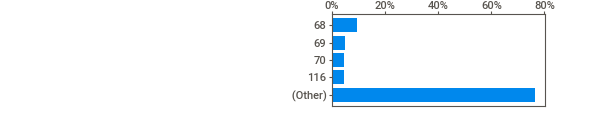
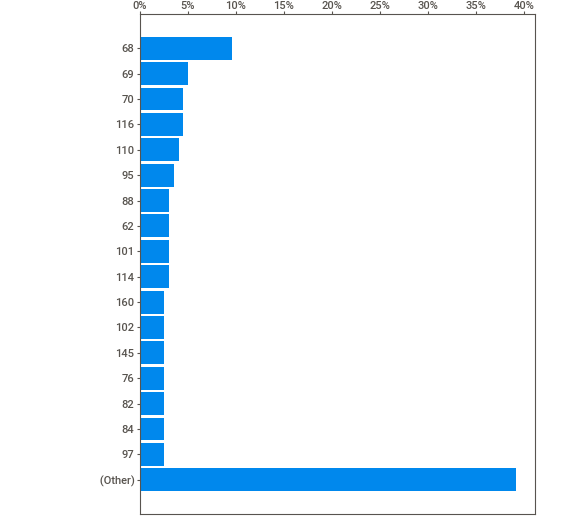
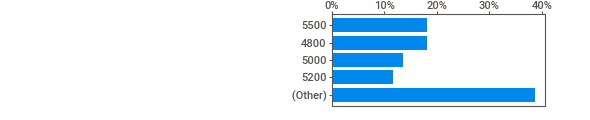
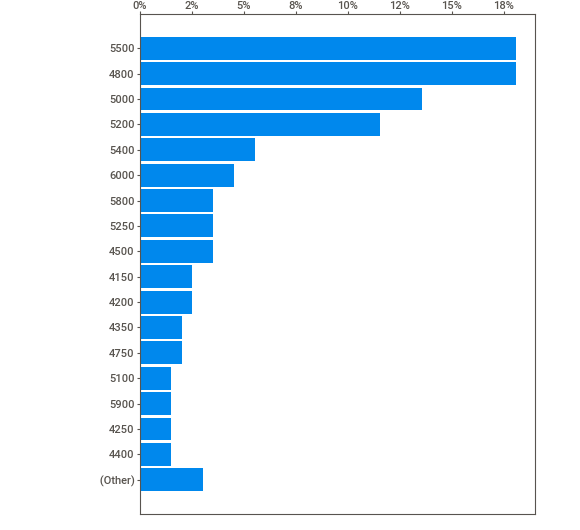
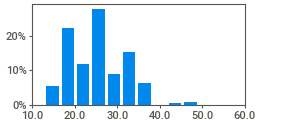
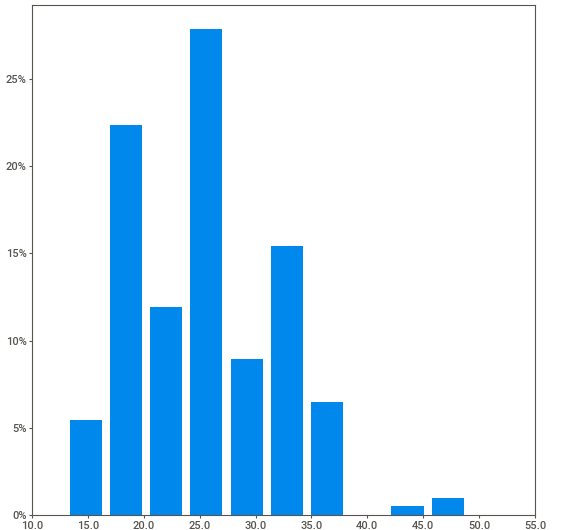
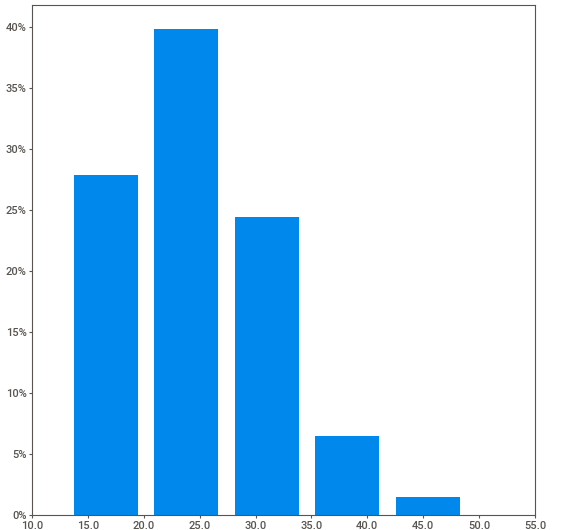
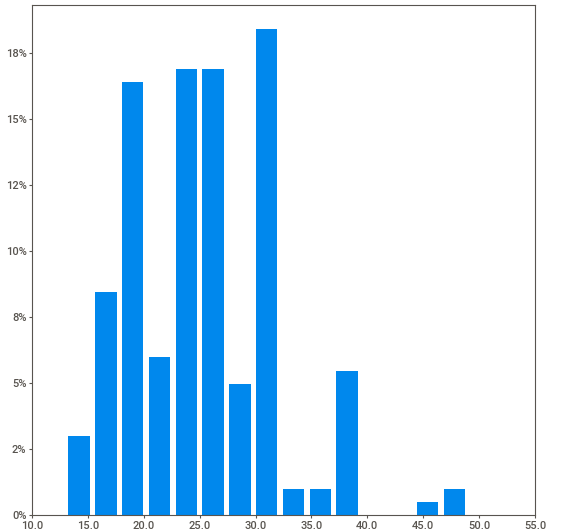
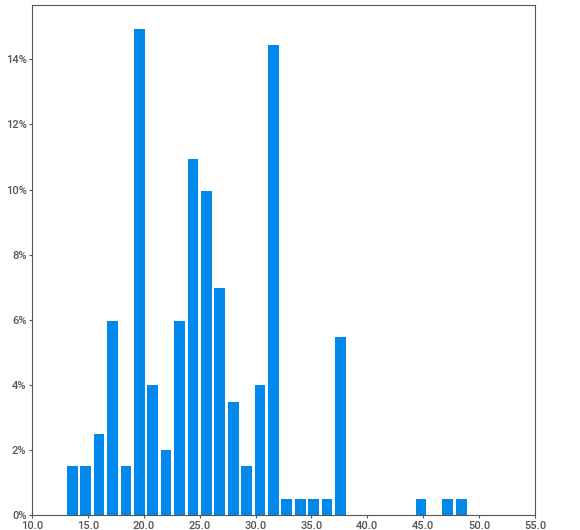
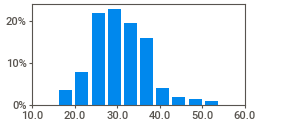
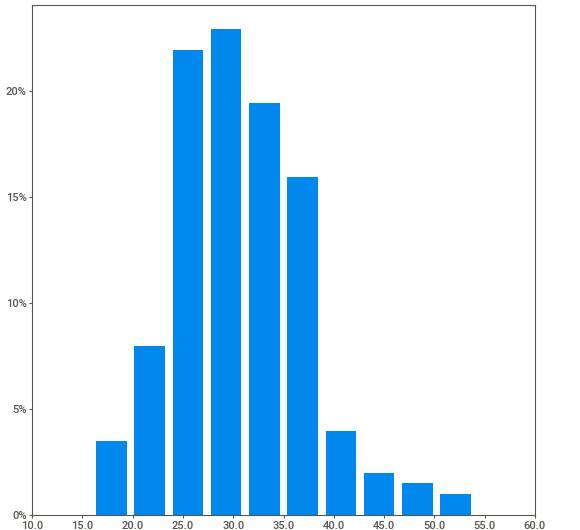
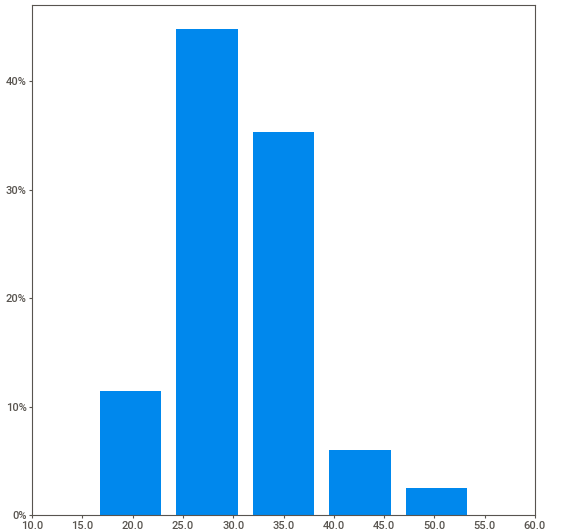
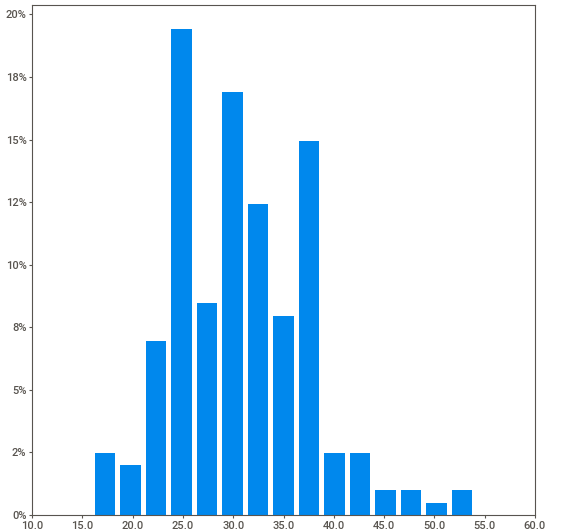
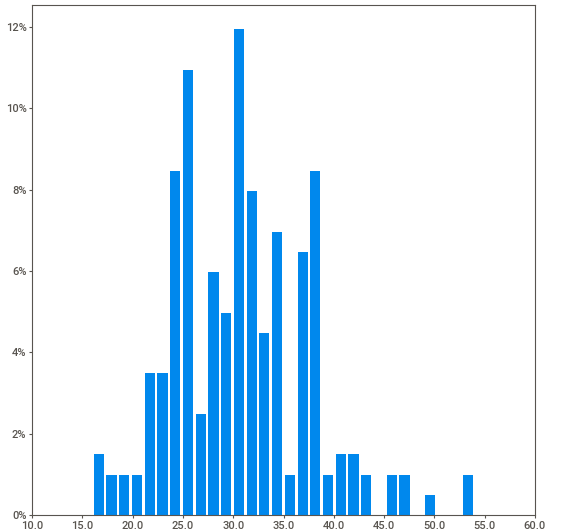
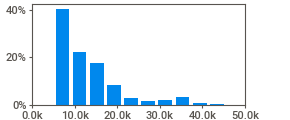
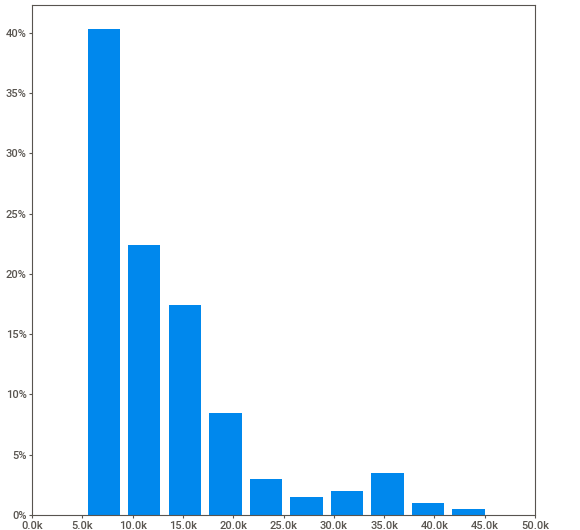
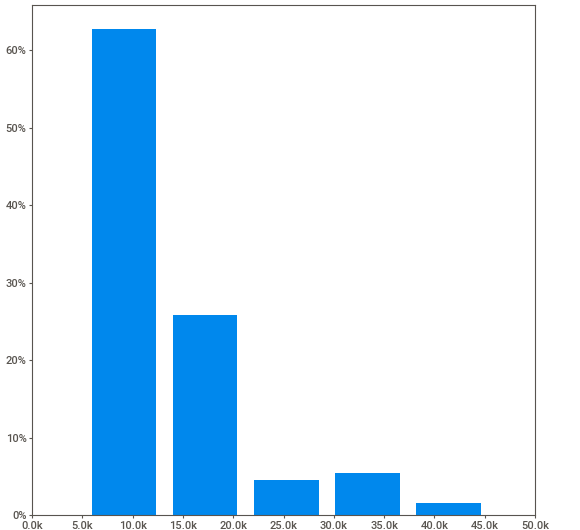
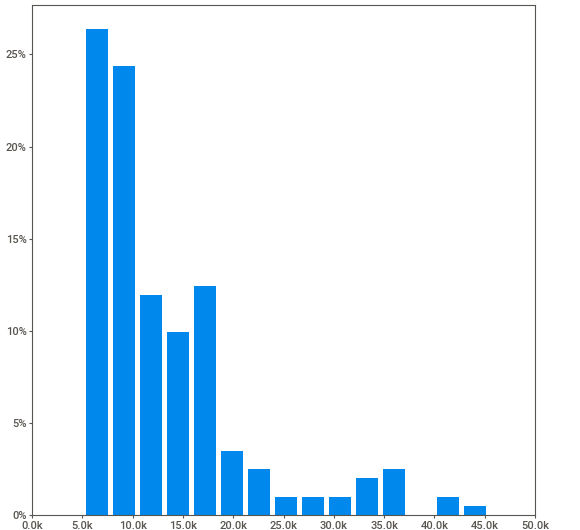
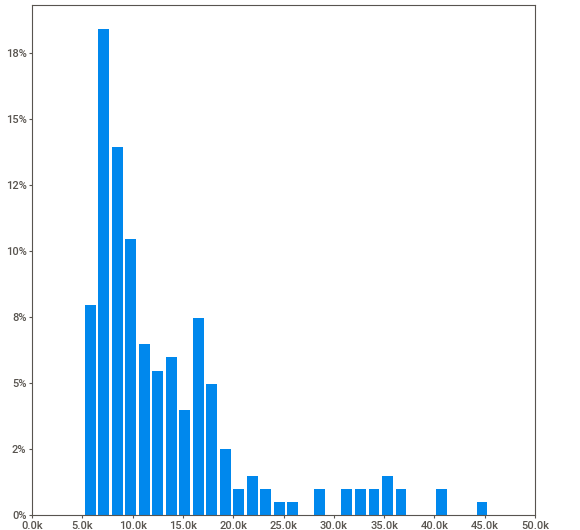
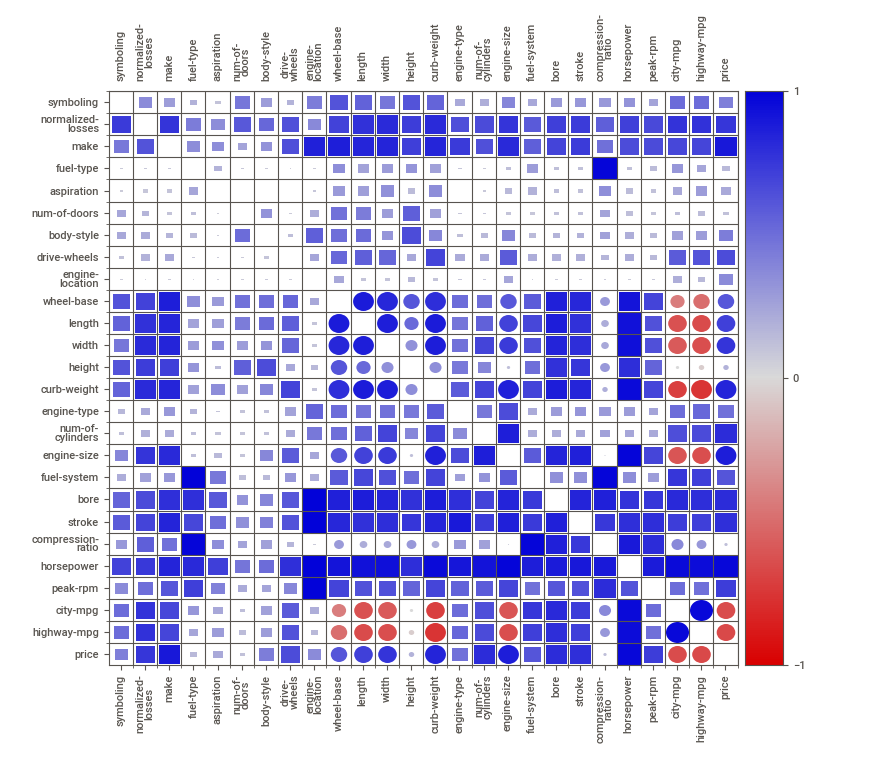
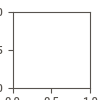

In [12]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_notebook()

## Insight :
1. Most of the automobiles have symboling 0 it means that these vechicles are safe to drive, comparing their price.
2. Most of the automobiles are from Toyota followed by nissan, mazda, mitsubishi and other.
3. There are more gas-fueled automobiles present in the data than diesel.
4. Std aspiration is common than turbo in most of the automobile.
5. Around 55% of the automobiles have 4 doors and 45% have 2 door.
6. Sedan body-style is observed more than other body-style, and second popular body-style is hatchback.
7. Very less automobiles have 4 wheel-drive.
8. Most of the automobille have their engine located in the front side.
9. ohc engine type observed more followed by ohcf, ohcv, dohc and other.
10. Around 78% of automobile have 4 cylinders in the engine.

# Multivariate analysis:

### NOTE : Insights are written below the graphs.

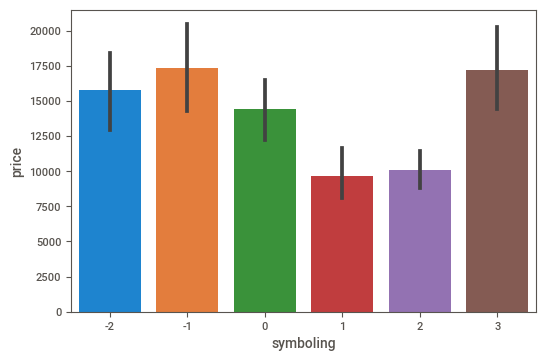

In [13]:
sns.barplot('symboling','price',data=df)
plt.show()

when the car is having less risk have higher price but we can also see the car having high risk also have high price it means that from doamain analysis we can conlclude that they are sports vechicle.

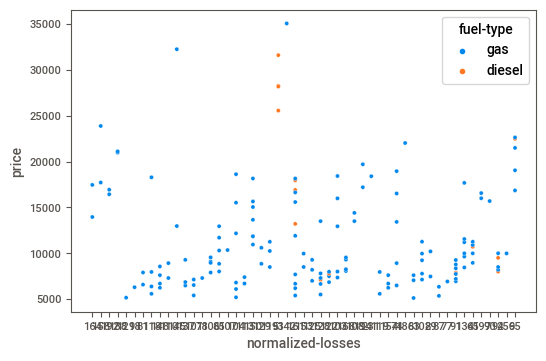

In [14]:
sns.scatterplot('normalized-losses','price',hue='fuel-type',data=df)
plt.show()

Those cars which have less normalized losses have comparitively higher price than those who have high normalized loss.
in the range between 125 to 150 we have highest car price observed.

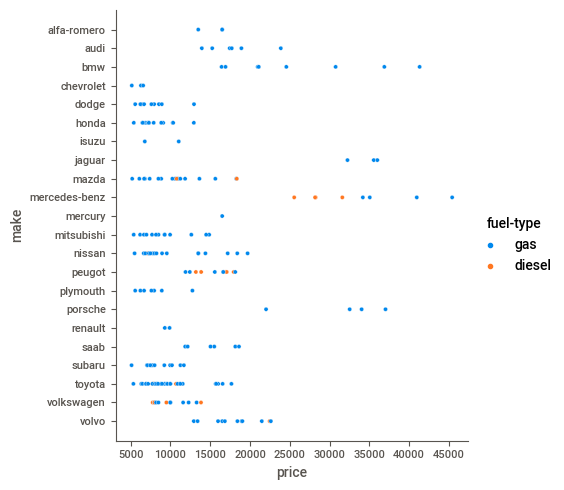

In [15]:
sns.relplot('price','make',hue='fuel-type',data=df)
plt.show()

most of the vechicle price ranges between 10000 to 20000.
mercedes-benz, jaguar, bmw, porshe have cars in the range of 20000 and above.

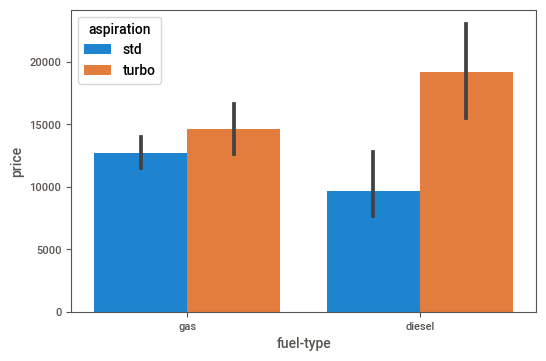

In [16]:
sns.barplot('fuel-type','price',hue='aspiration',data=df)
plt.show()

most expensive cars have diesel fuel type and the cars having turbo aspiration are comparatively expensive than standard one.

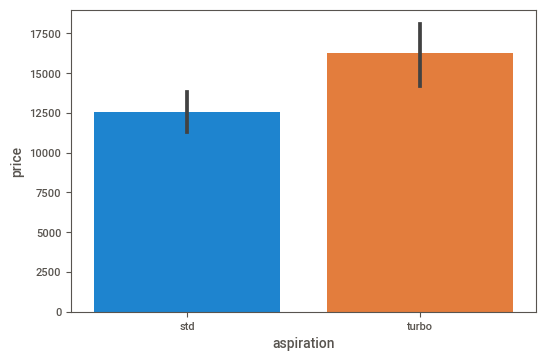

In [17]:
sns.barplot('aspiration','price',data=df)
plt.show()

turbo aspiration vechicle are more expensive than satndard vechicle.

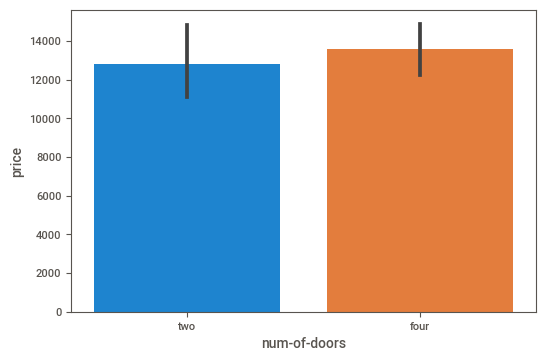

In [18]:
sns.barplot('num-of-doors','price',data=df)
plt.show()

tere is not much difference observed in the prices with respect to number of doors. but as per domain analysis the sports cars have 2 doors most of the time and they are more expensive, the luxuary cars are also have higher price.

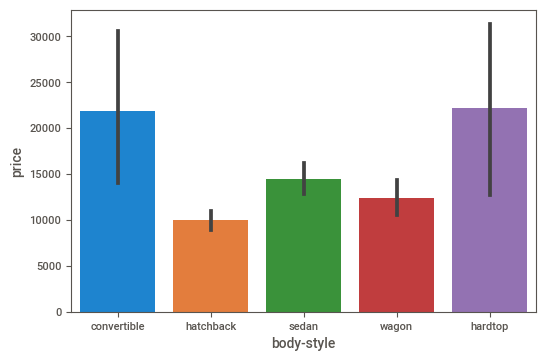

In [19]:
sns.barplot('body-style','price',data=df)
plt.show()

hardtop cars are more expensive and hatchback are the less expensive.

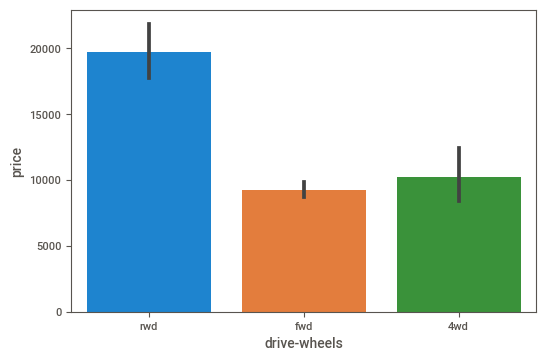

In [20]:
sns.barplot('drive-wheels','price',data=df)
plt.show()

the cars have rear wheel drive are observed to have more price than forward and 4-wheel drive.

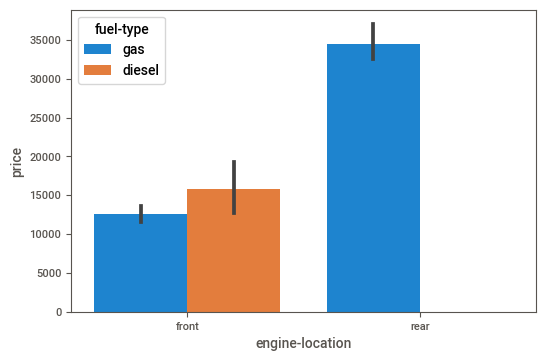

In [21]:
sns.barplot('engine-location','price',hue='fuel-type',data=df)
plt.show()

The cars have their engine in the back are observed more expensive. these vechicles are fueled with gas only.

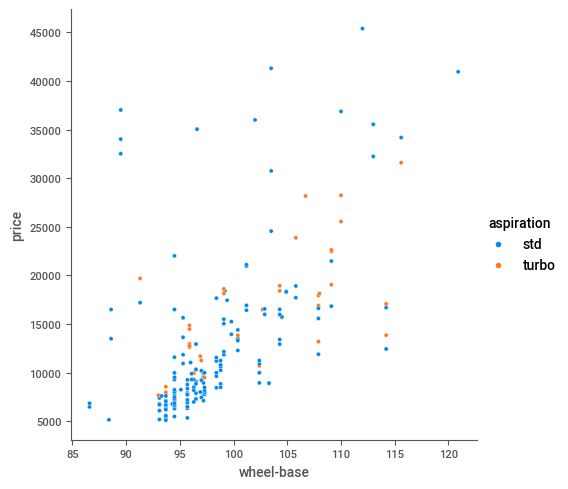

In [22]:
sns.relplot('wheel-base','price',hue='aspiration',data=df)
plt.show()

cars with wheel base ranges between 93 to 105 have the price between 5000 to 15000.
We can observe increase in the price as the wheel-base is increasing.

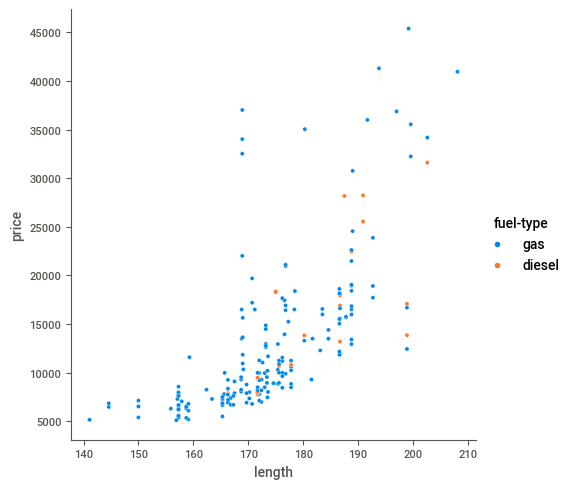

In [23]:
sns.relplot('length','price',hue='fuel-type',data=df)
plt.show()

as the length of the vechicle is increasing the raise in price is also observed.

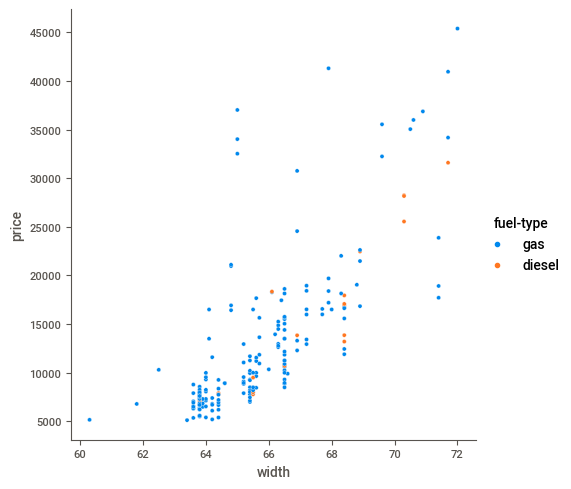

In [24]:
sns.relplot('width','price',hue='fuel-type',data=df)
plt.show()

Increasing width leading to increase in the price.

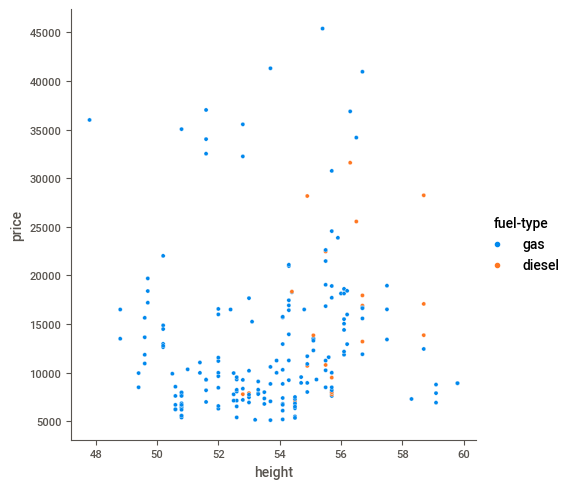

In [25]:
sns.relplot('height','price',hue='fuel-type',data=df)
plt.show()

In the range of 50 to 56 most of the cars have 5000 to 10000 price.
But ther is no as such relationship observed in the height and price.

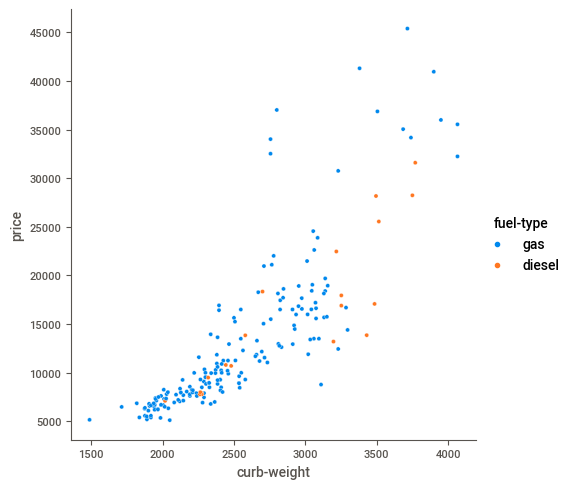

In [26]:
sns.relplot('curb-weight','price',hue='fuel-type',data=df)
plt.show()

As the car gets heavier the price of the cars observed increasing.
The most of the cars have curb-weight in the range of 1500 to 3200.

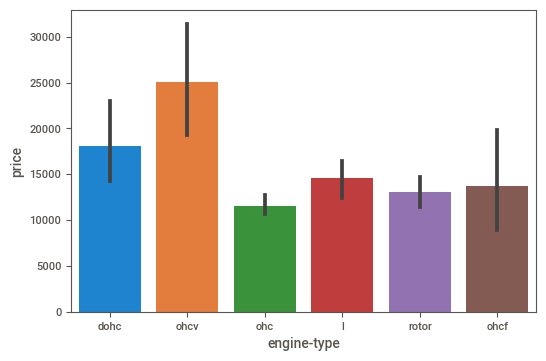

In [27]:
sns.barplot('engine-type','price',data=df)
plt.show()

ohcv engine type cars are most expensive.
And ohc cars have less price in comparison to other engined cars.

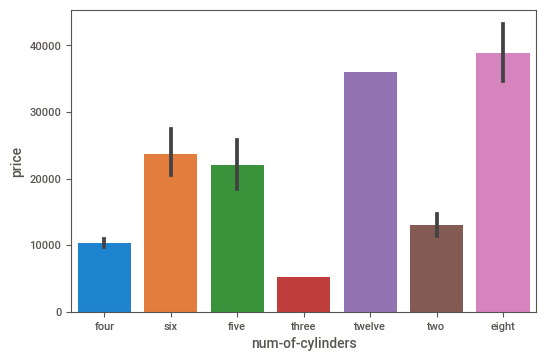

In [28]:
sns.barplot('num-of-cylinders','price',data=df)
plt.show()

On broader prespective as the number of cylinders increaseing the price of the vechicle is also increasing.

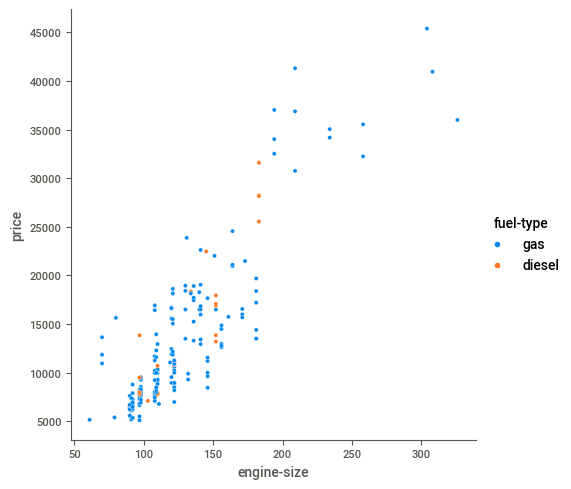

In [29]:
sns.relplot('engine-size','price',hue='fuel-type',data=df)
plt.show()

We can see gradual increase in the price of the cars as the engine-size is increasing.

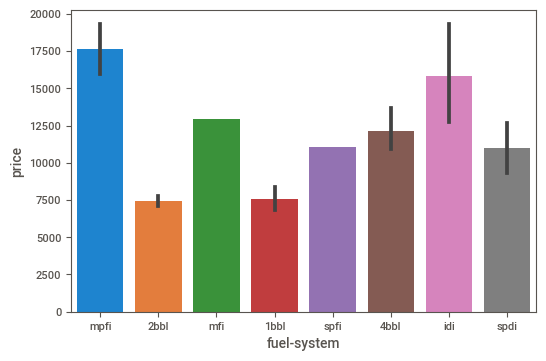

In [30]:
sns.barplot('fuel-system','price',data=df)
plt.show()

the cars with fuel-system mpfi have higher price than other cars and 2bbl is the cheapest in the comparison.

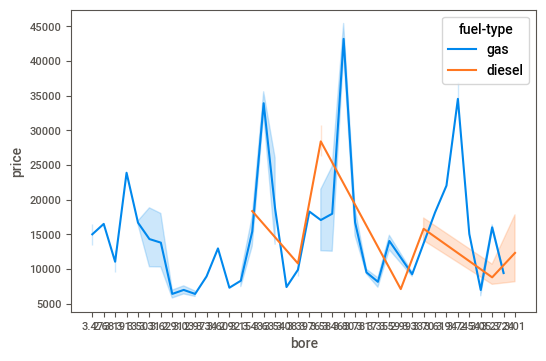

In [31]:
sns.lineplot('bore','price',hue='fuel-type',data=df)
plt.show()

We can see the ups and downs in the price as the bore is increasing, but it is increasing only.
So we can say that as the bore size is increasing the price of car is also increasing.

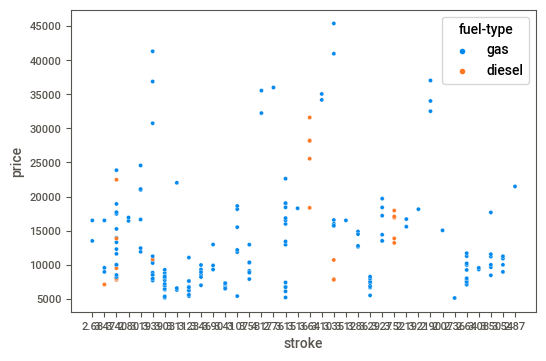

In [32]:
sns.scatterplot('stroke','price',hue='fuel-type',data=df)
plt.show()

The most expensive cars have strokes in the range 3.0 to 3.5.

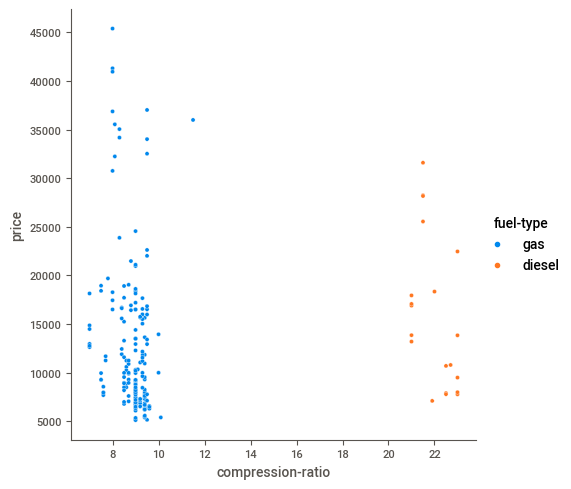

In [33]:
sns.relplot('compression-ratio','price',hue='fuel-type',data=df)
plt.show()

Cars fueled with gas have less compression ratio and high price than diesel cars.

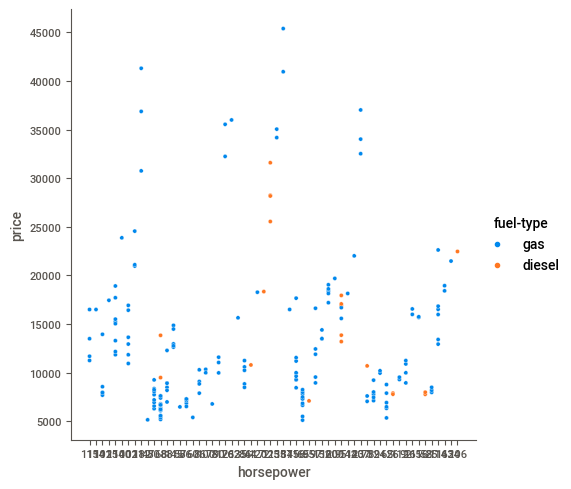

In [34]:
sns.relplot('horsepower','price',hue='fuel-type',data=df)
plt.show()

We can clearly observe the gradual increase in the price as the horsepower is increasing.
So we can say that more the horsepower expensive is the car.

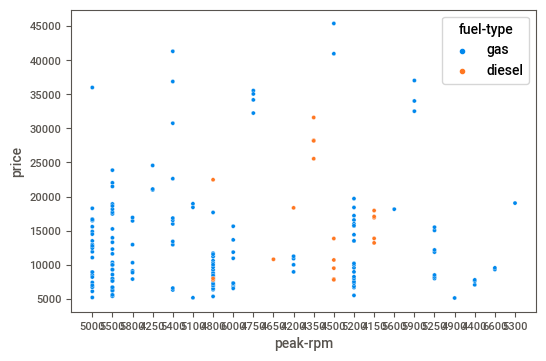

In [35]:
sns.scatterplot('peak-rpm','price',hue='fuel-type',data=df)
plt.show()

we can see no trend in the data. so we can say that there is no relationship in the price and peak-rpm.

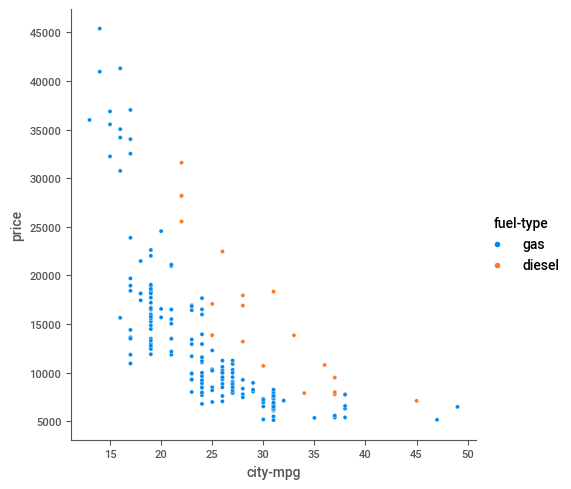

In [36]:
sns.relplot('city-mpg','price',hue='fuel-type',data=df)
plt.show()

we can see that city-mpg is inversely proportional to the price, we can say that low price vechicle have hight city-mpg.

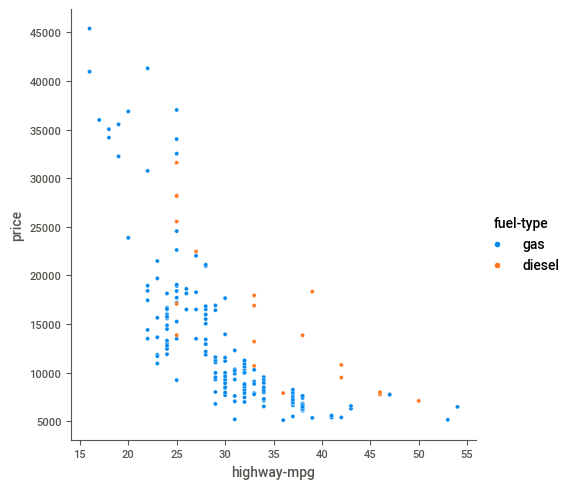

In [37]:
sns.relplot('highway-mpg','price',hue='fuel-type',data=df)
plt.show()

Same trend is observed as the city-mpg.

# Data Pre-processing :

## Handeling Missing Values :

In [38]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [39]:
df.loc[df['normalized-losses'].isnull()==True,'normalized-losses'] = df['normalized-losses'].median()
df.loc[df['num-of-doors'].isnull()==True,'num-of-doors'] = 'four' #used mode here
df.loc[df['bore'].isnull()==True,'bore'] = df['bore'].median()
df.loc[df['stroke'].isnull()==True,'stroke'] = df['stroke'].median()
df.loc[df['horsepower'].isnull()==True,'horsepower'] = df['horsepower'].median()
df.loc[df['peak-rpm'].isnull()==True,'peak-rpm'] = df['peak-rpm'].median()

In [40]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Handeling categorical features :

## 1. Make

In [41]:
df.loc[df['make']=='toyota','make'] = 13
df.loc[df['make']=='nissan','make'] = 12
df.loc[df['make']=='mazda','make'] = 11
df.loc[df['make']=='mitsubishi','make'] = 10
df.loc[df['make']=='honda','make'] = 10
df.loc[df['make']=='volkswagen','make'] = 9
df.loc[df['make']=='subaru','make'] = 9
df.loc[df['make']=='peugot','make'] = 8
df.loc[df['make']=='volvo','make'] = 8
df.loc[df['make']=='dodge','make'] = 7
df.loc[df['make']=='mercedes-benz','make'] = 6
df.loc[df['make']=='bmw','make'] = 6
df.loc[df['make']=='plymouth','make'] = 5
df.loc[df['make']=='audi','make'] = 4
df.loc[df['make']=='saab','make'] = 4
df.loc[df['make']=='porsche','make'] = 3
df.loc[df['make']=='jaguar','make'] = 2
df.loc[df['make']=='chevrolet','make'] = 2
df.loc[df['make']=='alfa-romero','make'] = 2
df.loc[df['make']=='isuzu','make'] = 1
df.loc[df['make']=='renault','make'] = 1
df.loc[df['make']=='mercury','make'] = 0

In [42]:
df['make'].value_counts()

13    32
10    26
9     24
8     22
12    18
11    17
6     16
4     12
2      9
7      9
5      7
1      4
3      4
0      1
Name: make, dtype: int64

In [43]:
df.head(2)

symboling normalized-losses make fuel-type aspiration num-of-doors  \
0          3             115.0    2       gas        std          two   
1          3             115.0    2       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   

   price  
0  13495  
1  16500

## 2. fuel_type

In [44]:
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [45]:
df.loc[df['fuel-type']== 'gas','fuel-type'] = 1
df.loc[df['fuel-type']=='diesel','fuel-type']=0

In [46]:
df['fuel-type'].value_counts()

1    181
0     20
Name: fuel-type, dtype: int64

## 3. 'aspiration'

In [47]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [48]:
df.loc[df['aspiration']=='std','aspiration'] = 1
df.loc[df['aspiration']=='turbo','aspiration'] = 0

In [49]:
df['aspiration'].value_counts()

1    165
0     36
Name: aspiration, dtype: int64

## 4. 'num-of-doors'

In [50]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [51]:
df.loc[df['num-of-doors']=='four','num-of-doors'] = 1
df.loc[df['num-of-doors']=='two','num-of-doors'] = 0

In [52]:
df['num-of-doors'].value_counts()

1    115
0     86
Name: num-of-doors, dtype: int64

## 5. 'body-style'

In [53]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [54]:
df.loc[df['body-style']=='sedan','body-style'] = 4
df.loc[df['body-style']=='hatchback','body-style'] = 3
df.loc[df['body-style']=='wagon','body-style'] = 2
df.loc[df['body-style']=='hardtop','body-style'] = 1
df.loc[df['body-style']=='convertible','body-style'] = 0

In [55]:
df['body-style'].value_counts()

4    94
3    68
2    25
1     8
0     6
Name: body-style, dtype: int64

## 6. 'drive-wheels'

In [56]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [57]:
df.loc[df['drive-wheels']=='fwd','drive-wheels'] = 2
df.loc[df['drive-wheels']=='rwd','drive-wheels'] = 1
df.loc[df['drive-wheels']=='4wd','drive-wheels'] = 0

In [58]:
df['drive-wheels'].value_counts()

2    118
1     75
0      8
Name: drive-wheels, dtype: int64

## 7. 'engine-location'

In [59]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [60]:
df.loc[df['engine-location']=='front','engine-location'] = 1
df.loc[df['engine-location']=='rear','engine-location'] = 0

In [61]:
df['engine-location'].value_counts()

1    198
0      3
Name: engine-location, dtype: int64

## 8. 'engine-type'

In [62]:
df['engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64

In [63]:
df.loc[df['engine-type']=='ohc','engine-type'] = 4
df.loc[df['engine-type']=='ohcf','engine-type'] = 3
df.loc[df['engine-type']=='ohcv','engine-type'] = 2
df.loc[df['engine-type']=='dohc','engine-type'] = 1
df.loc[df['engine-type']=='l','engine-type'] = 1
df.loc[df['engine-type']=='rotor','engine-type'] = 0

In [64]:
df['engine-type'].value_counts()

4    145
1     24
3     15
2     13
0      4
Name: engine-type, dtype: int64

## 9. 'num-of-cylinders'

In [65]:
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [66]:
df.loc[df['num-of-cylinders']=='four','num-of-cylinders'] = 4
df.loc[df['num-of-cylinders']=='six','num-of-cylinders'] = 3
df.loc[df['num-of-cylinders']=='five','num-of-cylinders'] = 2
df.loc[df['num-of-cylinders']=='two','num-of-cylinders'] = 1
df.loc[df['num-of-cylinders']=='eight','num-of-cylinders'] = 1
df.loc[df['num-of-cylinders']=='three','num-of-cylinders'] = 0
df.loc[df['num-of-cylinders']=='twelve','num-of-cylinders'] = 0

In [67]:
df['num-of-cylinders'].value_counts()

4    157
3     24
2     10
1      8
0      2
Name: num-of-cylinders, dtype: int64

## 10. 'fuel-system'

In [68]:
df['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [69]:
df.loc[df['fuel-system']=='mpfi','fuel-system']=6
df.loc[df['fuel-system']=='2bbl','fuel-system']=5
df.loc[df['fuel-system']=='idi','fuel-system']=4
df.loc[df['fuel-system']=='1bbl','fuel-system']=3
df.loc[df['fuel-system']=='spdi','fuel-system']=2
df.loc[df['fuel-system']=='4bbl','fuel-system']=1
df.loc[df['fuel-system']=='mfi','fuel-system']=0
df.loc[df['fuel-system']=='spfi','fuel-system']=0

In [70]:
df['fuel-system'].value_counts()

6    92
5    64
4    20
3    11
2     9
1     3
0     2
Name: fuel-system, dtype: int64

In [71]:
pd.set_option('display.max_columns',300)
df.head(2)

symboling normalized-losses make fuel-type aspiration num-of-doors  \
0          3             115.0    2         1          1            0   
1          3             115.0    2         1          1            0   

  body-style drive-wheels engine-location  wheel-base  length  width  height  \
0          0            1               1        88.6   168.8   64.1    48.8   
1          0            1               1        88.6   168.8   64.1    48.8   

   curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
0         2548           1                4          130           6  3.47   
1         2548           1                4          130           6  3.47   

  stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0   2.68                9.0        111     5000        21           27  13495  
1   2.68                9.0        111     5000        21           27  16500

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### We used manual encoding to convert the categorical data into numerical.

### * As we have object datatype in the dataset we need to change the datatype.

In [73]:
for c in df.columns:#columns form datasets
    if(df[c].dtype=='object'):#checking datatype of labels
        print(c)  #categorical columns

normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system
bore
stroke
horsepower
peak-rpm


In [74]:
# Chenging the datatype.
df['make']=df['make'].astype('int64') 
df['fuel-type']=df['fuel-type'].astype('float64')
df['aspiration']=df['aspiration'].astype('float64')
df['num-of-doors']=df['num-of-doors'].astype('int64')
df['body-style']=df['body-style'].astype('int64')
df['drive-wheels']=df['drive-wheels'].astype('float64')
df['engine-location']=df['engine-location'].astype('float64')
df['engine-type']=df['engine-type'].astype('float64')
df['num-of-cylinders']=df['num-of-cylinders'].astype('float64')
df['fuel-system']=df['fuel-system'].astype('float64')
df['normalized-losses']=df['normalized-losses'].astype('float64')
df['bore']=df['bore'].astype('float64')
df['stroke']=df['stroke'].astype('float64')
df['horsepower']=df['horsepower'].astype('float64')
df['peak-rpm']=df['peak-rpm'].astype('float64')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    float64
 4   aspiration         201 non-null    float64
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    int64  
 7   drive-wheels       201 non-null    float64
 8   engine-location    201 non-null    float64
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    float64
 15  num-of-cylinders   201 non-null    float64
 16  engine-size        201 non

* As we can see above no object datatype is present in our dataset it means that we have successfully converted the datatype in the numerical.

## Handeling an Outliers :

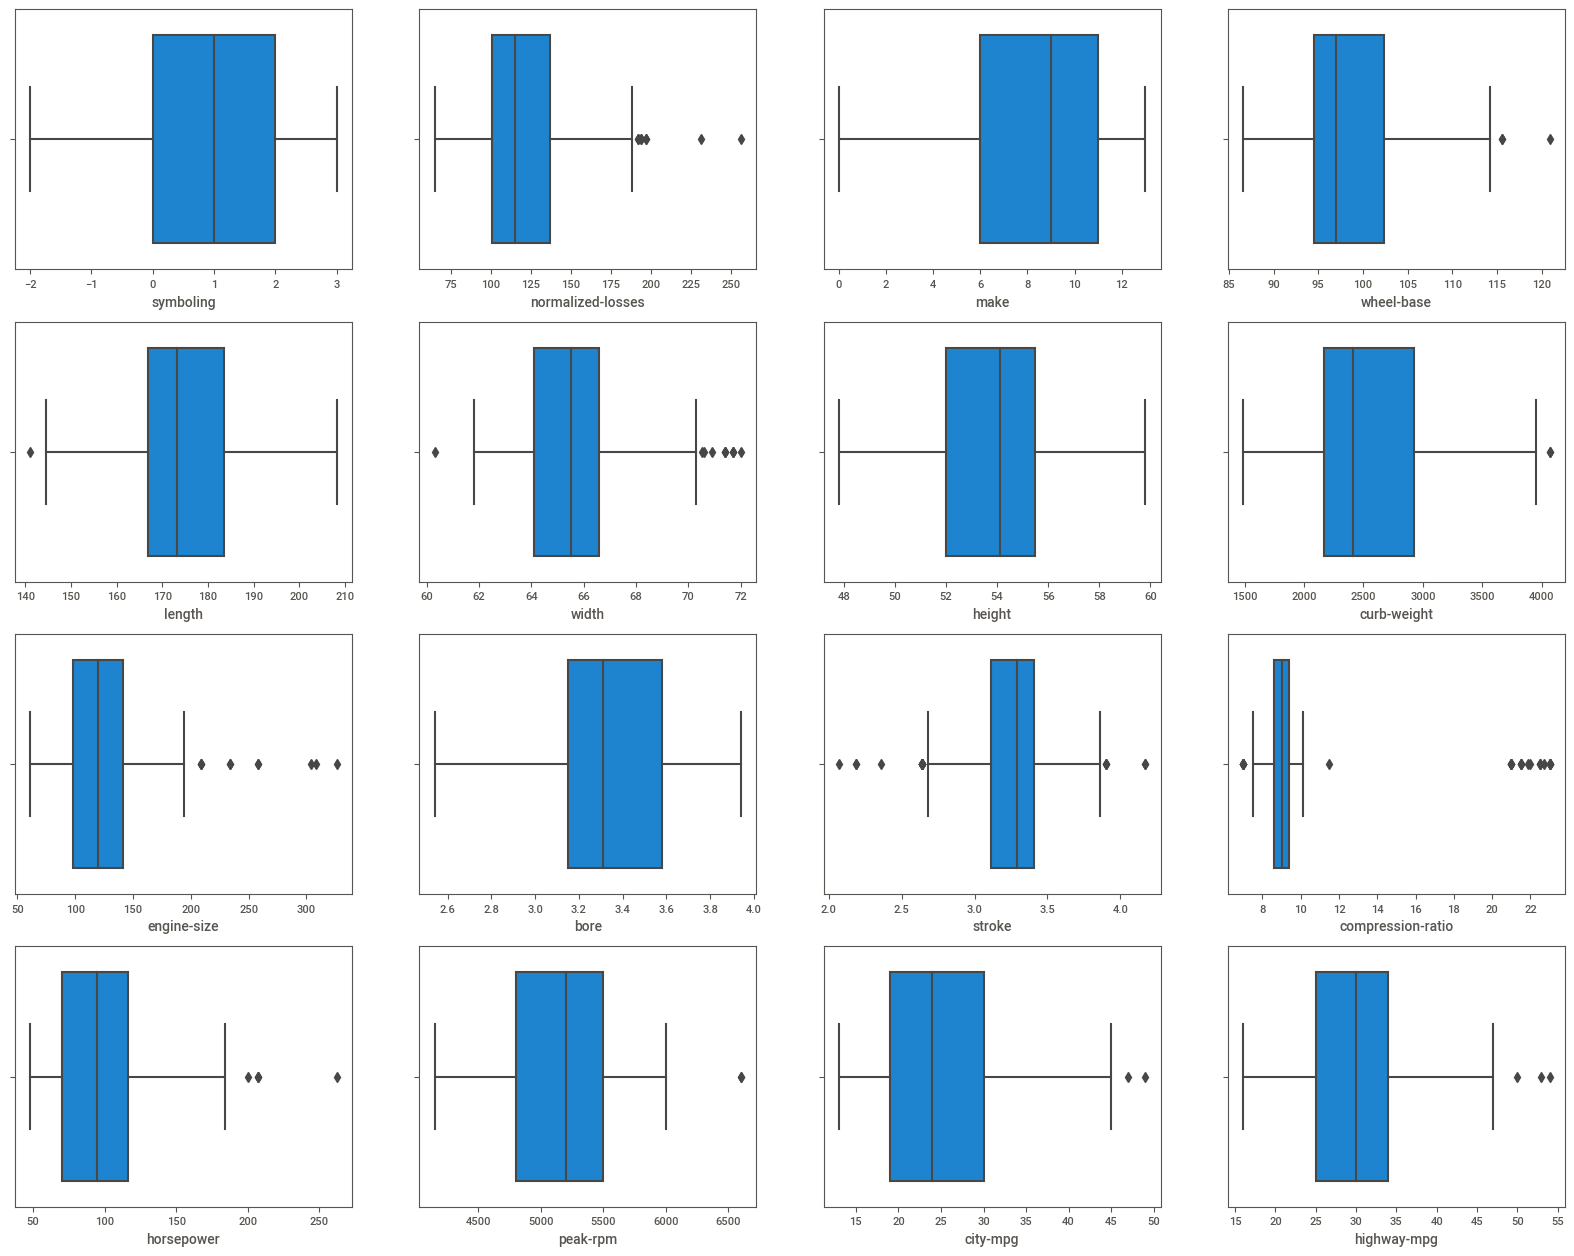

In [76]:
# Checking for an outlier :
box=df[['symboling', 'normalized-losses', 'make', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=20: 
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [77]:
# Importing stats from scipy
from scipy import stats as st

## 1. Normalized - lossess

In [78]:
IQR = st.iqr(df['normalized-losses'],interpolation='midpoint')
Q1 = df['normalized-losses'].quantile(0.25)
Q3 = df['normalized-losses'].quantile(0.75)
Q1,Q3,IQR

(101.0, 137.0, 36.0)

In [79]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(47.0, 191.0)

In [80]:
df[(df['normalized-losses']<lower_limit)|(df['normalized-losses']>upper_limit)]

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
9            2              192.0     6        1.0         1.0             0   
10           0              192.0     6        1.0         1.0             1   
101          3              194.0    12        1.0         1.0             0   
102          3              194.0    12        1.0         0.0             0   
103          1              231.0    12        1.0         1.0             0   
174          3              197.0    13        1.0         1.0             0   
175          3              197.0    13        1.0         1.0             0   
186          3              256.0     9        1.0         1.0             0   

     body-style  drive-wheels  engine-location  wheel-base  length  width  \
9             4           1.0              1.0       101.2   176.8   64.8   
10            4           1.0              1.0       101.2   176.8   64.8   
101           3           1.0              1.0        91.3   170.7   67.9   
102           3           1.0              1.0        91.3   170.7   67.9   
103           3           1.0              1.0        99.2   178.5   67.9   
174           3           1.0              1.0       102.9   183.5   67.7   
175           3           1.0              1.0       102.9   183.5   67.7   
186           3           2.0              1.0        94.5   165.7   64.0   

     height  curb-weight  engine-type  num-of-cylinders  engine-size  \
9      54.3         2395          4.0               4.0          108   
10     54.3         2395          4.0               4.0          108   
101    49.7         3071          2.0               3.0          181   
102    49.7         3139          2.0               3.0          181   
103    49.7         3139          2.0               3.0          181   
174    52.0         2976          1.0               3.0          171   
175    52.0         3016          1.0               3.0          171   
186    51.4         2221          4.0               4.0          109   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
9            6.0  3.50    2.80                8.8       101.0    5800.0   
10           6.0  3.50    2.80                8.8       101.0    5800.0   
101          6.0  3.43    3.27                9.0       160.0    5200.0   
102          6.0  3.43    3.27                7.8       200.0    5200.0   
103          6.0  3.43    3.27                9.0       160.0    5200.0   
174          6.0  3.27    3.35                9.3       161.0    5200.0   
175          6.0  3.27    3.35                9.3       161.0    5200.0   
186          6.0  3.19    3.40                8.5        90.0    5500.0   

     city-mpg  highway-mpg  price  
9          23           29  16430  
10         23           29  16925  
101        19           25  17199  
102        17           23  19699  
103        19           25  18399  
174        20           24  16558  
175        19           24  15998  
186        24           29   9980

In [81]:
df[(df['normalized-losses']>lower_limit)|(df['normalized-losses']<upper_limit)] # Data within IQR range.

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3              115.0     2        1.0         1.0             0   
1            3              115.0     2        1.0         1.0             0   
2            1              115.0     2        1.0         1.0             0   
3            2              164.0     4        1.0         1.0             1   
4            2              164.0     4        1.0         1.0             1   
..         ...                ...   ...        ...         ...           ...   
196         -1               95.0     8        1.0         1.0             1   
197         -1               95.0     8        1.0         0.0             1   
198         -1               95.0     8        1.0         1.0             1   
199         -1               95.0     8        0.0         0.0             1   
200         -1               95.0     8        1.0         0.0             1   

     body-style  drive-wheels  engine-location  wheel-base  length  width  \
0             0           1.0              1.0        88.6   168.8   64.1   
1             0           1.0              1.0        88.6   168.8   64.1   
2             3           1.0              1.0        94.5   171.2   65.5   
3             4           2.0              1.0        99.8   176.6   66.2   
4             4           0.0              1.0        99.4   176.6   66.4   
..          ...           ...              ...         ...     ...    ...   
196           4           1.0              1.0       109.1   188.8   68.9   
197           4           1.0              1.0       109.1   188.8   68.8   
198           4           1.0              1.0       109.1   188.8   68.9   
199           4           1.0              1.0       109.1   188.8   68.9   
200           4           1.0              1.0       109.1   188.8   68.9   

     height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0      48.8         2548          1.0               4.0          130   
1      48.8         2548          1.0               4.0          130   
2      52.4         2823          2.0               3.0          152   
3      54.3         2337          4.0               4.0          109   
4      54.3         2824          4.0               2.0          136   
..      ...          ...          ...               ...          ...   
196    55.5         2952          4.0               4.0          141   
197    55.5         3049          4.0               4.0          141   
198    55.5         3012          2.0               3.0          173   
199    55.5         3217          4.0               3.0          145   
200    55.5         3062          4.0               4.0          141   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0            6.0  3.47    2.68                9.0       111.0    5000.0   
1            6.0  3.47    2.68                9.0       111.0    5000.0   
2            6.0  2.68    3.47                9.0       154.0    5000.0   
3            6.0  3.19    3.40               10.0       102.0    5500.0   
4            6.0  3.19    3.40                8.0       115.0    5500.0   
..           ...   ...     ...                ...         ...       ...   
196          6.0  3.78    3.15                9.5       114.0    5400.0   
197          6.0  3.78    3.15                8.7       160.0    5300.0   
198          6.0  3.58    2.87                8.8       134.0    5500.0   
199          4.0  3.01    3.40               23.0       106.0    4800.0   
200          6.0  3.78    3.15                9.5       114.0    5400.0   

     city-mpg  highway-mpg  price  
0          21           27  13495  
1          21           27  16500  
2          19           26  16500  
3          24           30  13950  
4          18           22  17450  
..        ...          ...    ...  
196        23           28  16845  
197        19           25  19045  
198        18           23  2

In [82]:
df.loc[(df['normalized-losses']<lower_limit)|(df['normalized-losses']>upper_limit),'normalized-losses'] = np.median(df['normalized-losses'])

In [83]:
df[(df['normalized-losses']<lower_limit)|(df['normalized-losses']>upper_limit)] # Outlier handled successfully...

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

## 2. Wheel-Base

In [84]:
IQR = st.iqr(df['wheel-base'],interpolation='midpoint')
Q1 = df['wheel-base'].quantile(0.25)
Q3 = df['wheel-base'].quantile(0.75)
Q1,Q3,IQR

(94.5, 102.4, 7.900000000000006)

In [85]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(82.64999999999999, 114.25000000000001)

In [86]:
df['wheel-base'].describe()

count    201.000000
mean      98.797015
std        6.066366
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

<AxesSubplot:xlabel='wheel-base'>

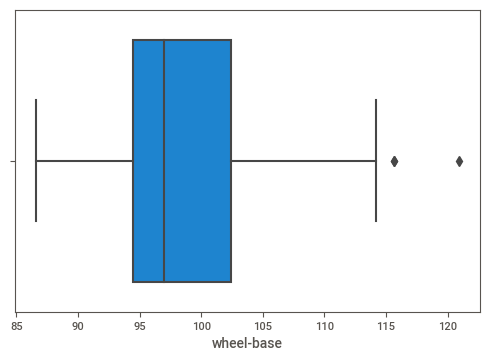

In [87]:
sns.boxplot(df['wheel-base'])

* As we can see here outliers are only available above the upper_limit so we will be handeling only those outliers.

In [88]:

df.loc[(df['wheel-base']>upper_limit),'wheel-base'] = np.median(df['wheel-base'])

In [89]:
df.loc[(df['wheel-base']>upper_limit),'wheel-base']

Series([], Name: wheel-base, dtype: float64)

## 3. Length

In [90]:
IQR = st.iqr(df['length'],interpolation='midpoint')
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
Q1,Q3,IQR

(166.8, 183.5, 16.69999999999999)

In [91]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(141.75000000000003, 208.54999999999998)

In [92]:
df['length'].describe()

count    201.000000
mean     174.200995
std       12.322175
min      141.100000
25%      166.800000
50%      173.200000
75%      183.500000
max      208.100000
Name: length, dtype: float64

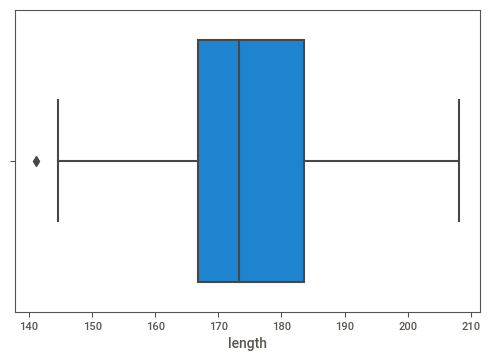

In [93]:
sns.boxplot(df['length']);

* As we can see here only below lower_limit an outlier is present so we will be handeling that only.

In [94]:
df.loc[(df['length']<lower_limit),'length'] = np.median(df['length'])

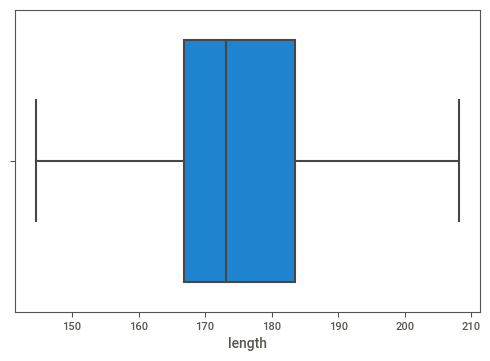

In [95]:
sns.boxplot(df['length']);

## 4. Width

In [96]:
IQR = st.iqr(df['width'],interpolation='midpoint')
Q1 = df['width'].quantile(0.25)
Q3 = df['width'].quantile(0.75)
Q1,Q3,IQR

(64.1, 66.6, 2.5)

In [97]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(60.349999999999994, 70.35)

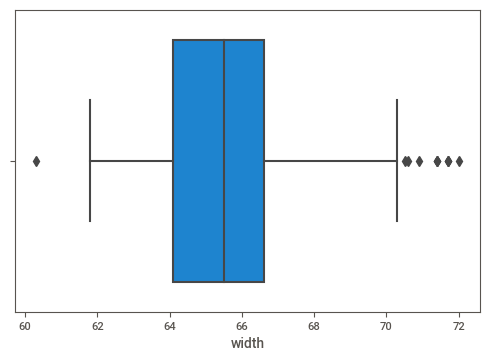

In [98]:
sns.boxplot(df['width']);

In [99]:
df.loc[(df['width']<lower_limit)|(df['width']>upper_limit),'width'] = np.median(df['width'])

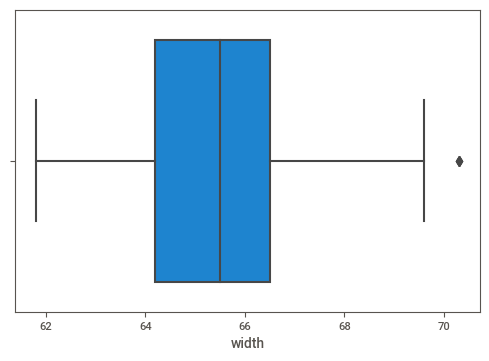

In [100]:
sns.boxplot(df['width']);

* This one outlier as shown in box plot is not an outlier, so no need to handle this, handeling this outlier will lead to corruption of the data.

## 5. Curb-Weight

In [101]:
IQR = st.iqr(df['curb-weight'],interpolation='midpoint')
Q1 = df['curb-weight'].quantile(0.25)
Q3 = df['curb-weight'].quantile(0.75)
Q1,Q3,IQR

(2169.0, 2926.0, 757.0)

In [102]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(1033.5, 4061.5)

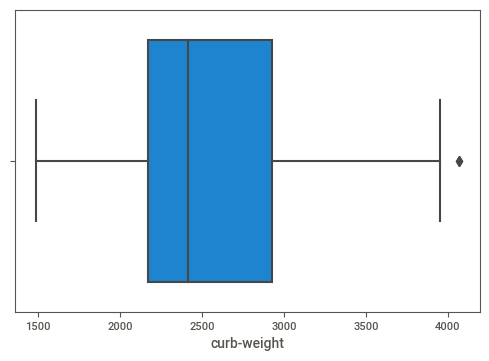

In [103]:
sns.boxplot(df['curb-weight']);

* only outlier above upper_limit needs to get handle.

In [104]:
df.loc[(df['curb-weight']>upper_limit),'curb-weight'] = np.median(df['curb-weight'])

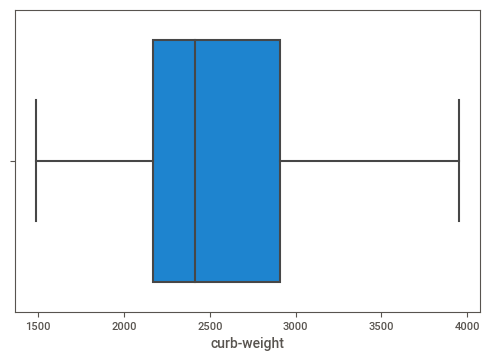

In [105]:
sns.boxplot(df['curb-weight']);

## 6. Engine-Size

In [106]:
IQR = st.iqr(df['engine-size'],interpolation='midpoint')
Q1 = df['engine-size'].quantile(0.25)
Q3 = df['engine-size'].quantile(0.75)
Q1,Q3,IQR

(98.0, 141.0, 43.0)

In [107]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(33.5, 205.5)

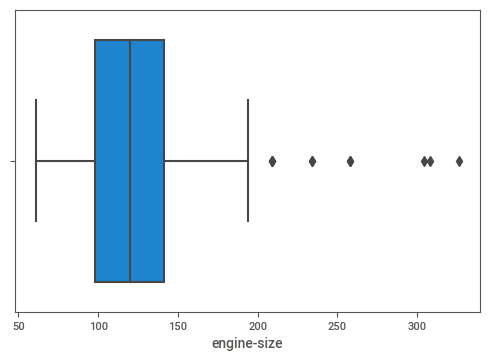

In [108]:
sns.boxplot(df['engine-size']);

In [109]:
df.loc[(df['engine-size']>upper_limit),'engine-size'] = np.median(df['engine-size'])

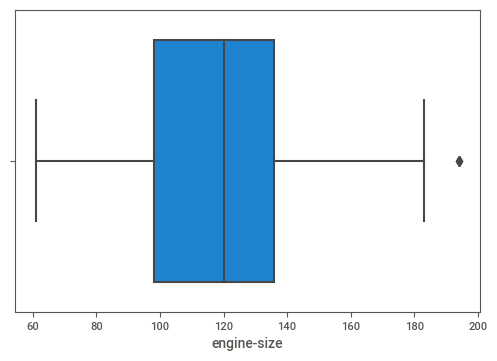

In [110]:
sns.boxplot(df['engine-size']);

## 7. stroke

In [111]:
IQR = st.iqr(df['stroke'],interpolation='midpoint')
Q1 = df['stroke'].quantile(0.25)
Q3 = df['stroke'].quantile(0.75)
Q1,Q3,IQR

(3.11, 3.41, 0.30000000000000027)

In [112]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(2.6599999999999993, 3.8600000000000003)

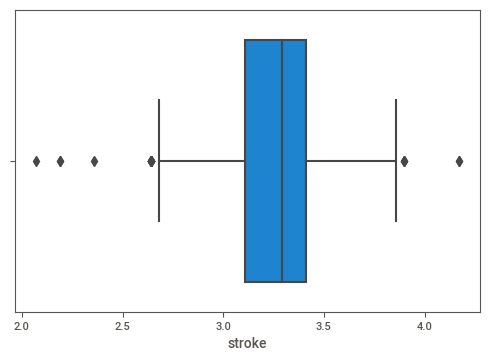

In [113]:
sns.boxplot(df['stroke']);

* as we have outliers in upper as well as lower limit we will handle both the outlier.

In [114]:

df.loc[(df['stroke']<lower_limit)|(df['stroke']>upper_limit),'stroke'] = np.median(df['stroke'])

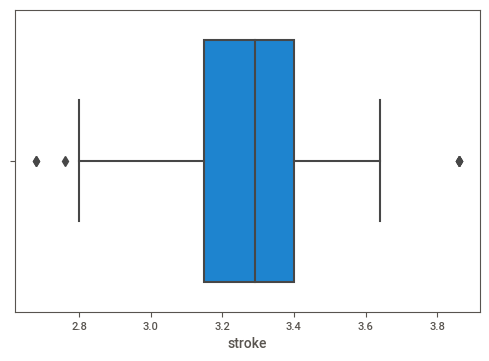

In [115]:
sns.boxplot(df['stroke']);

## 8. compression-ratio

In [116]:
IQR = st.iqr(df['compression-ratio'],interpolation='midpoint')
Q1 = df['compression-ratio'].quantile(0.25)
Q3 = df['compression-ratio'].quantile(0.75)
Q1,Q3,IQR

(8.6, 9.4, 0.8000000000000007)

In [117]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(7.399999999999999, 10.600000000000001)

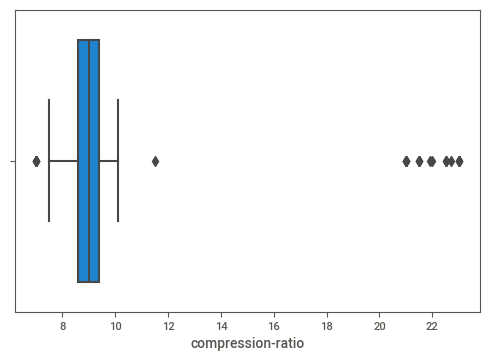

In [118]:
sns.boxplot(df['compression-ratio']);

* as we have outliers in upper as well as lower limit we will handle both the outlier.

In [119]:

df.loc[(df['compression-ratio']<lower_limit)|(df['compression-ratio']>upper_limit),'compression-ratio'] = np.median(df['compression-ratio'])

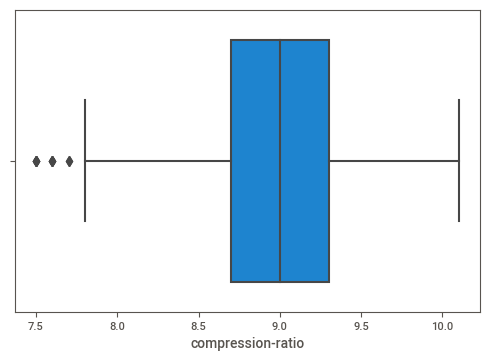

In [120]:
sns.boxplot(df['compression-ratio']);

## 9. horsepower

In [121]:
IQR = st.iqr(df['horsepower'],interpolation='midpoint')
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
Q1,Q3,IQR

(70.0, 116.0, 46.0)

In [122]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(1.0, 185.0)

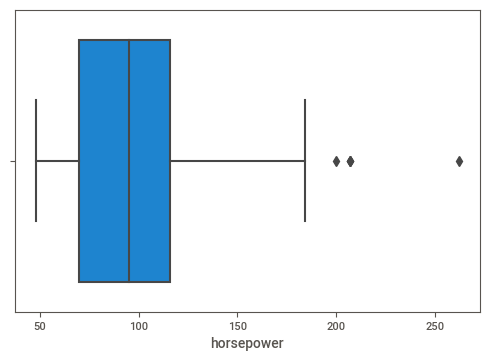

In [123]:
sns.boxplot(df['horsepower']);

* as we have outliers in upper_limit we will handle the outlier.

In [124]:

df.loc[(df['horsepower']>upper_limit),'horsepower'] = np.median(df['horsepower'])

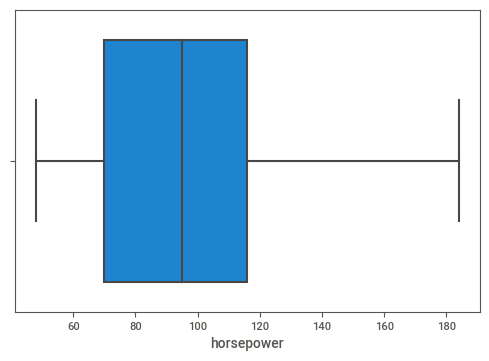

In [125]:
sns.boxplot(df['horsepower']);

## 10. peak-rpm

In [126]:
IQR = st.iqr(df['peak-rpm'],interpolation='midpoint')
Q1 = df['peak-rpm'].quantile(0.25)
Q3 = df['peak-rpm'].quantile(0.75)
Q1,Q3,IQR

(4800.0, 5500.0, 700.0)

In [127]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(3750.0, 6550.0)

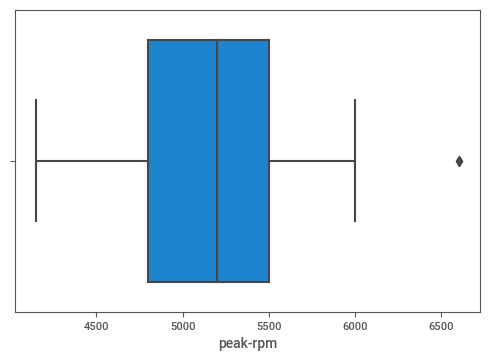

In [128]:
sns.boxplot(df['peak-rpm']);

* as we have outliers in upper_limit we will handle the outlier.

In [129]:

df.loc[(df['peak-rpm']>upper_limit),'peak-rpm'] = np.median(df['peak-rpm'])

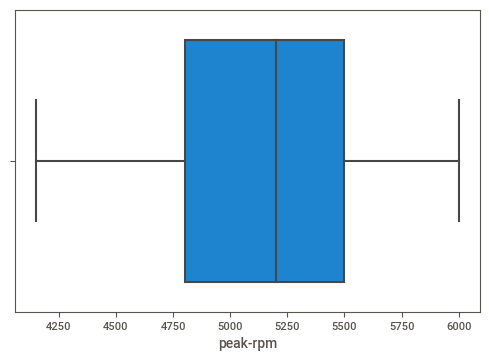

In [130]:
sns.boxplot(df['peak-rpm']);

## 11. city-mpg

In [131]:
IQR = st.iqr(df['city-mpg'],interpolation='midpoint')
Q1 = df['city-mpg'].quantile(0.25)
Q3 = df['city-mpg'].quantile(0.75)
Q1,Q3,IQR

(19.0, 30.0, 11.0)

In [132]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(2.5, 46.5)

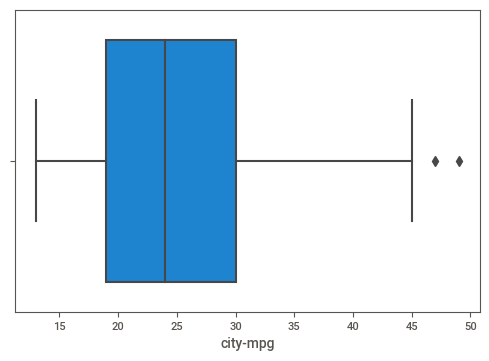

In [133]:
sns.boxplot(df['city-mpg']);

* as we have outliers in upper_limit we will handle the outlier.

In [134]:

df.loc[(df['city-mpg']>upper_limit),'city-mpg'] = np.median(df['city-mpg'])

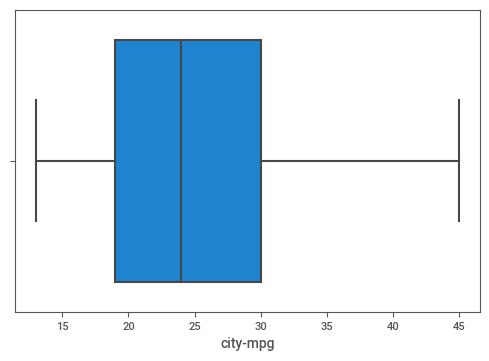

In [135]:
sns.boxplot(df['city-mpg']);

## 11. highway-mpg

In [136]:
IQR = st.iqr(df['highway-mpg'],interpolation='midpoint')
Q1 = df['highway-mpg'].quantile(0.25)
Q3 = df['highway-mpg'].quantile(0.75)
Q1,Q3,IQR

(25.0, 34.0, 9.0)

In [137]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(11.5, 47.5)

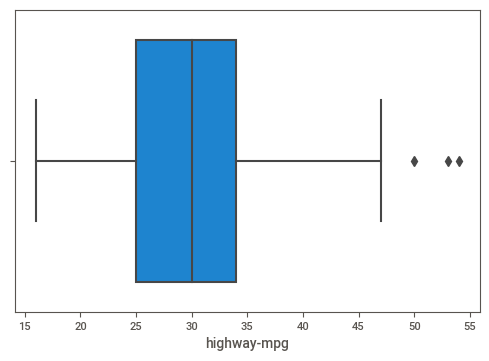

In [138]:
sns.boxplot(df['highway-mpg']);

* as we have outliers in upper_limit we will handle the outlier.

In [139]:

df.loc[(df['highway-mpg']>upper_limit),'highway-mpg'] = np.median(df['highway-mpg'])

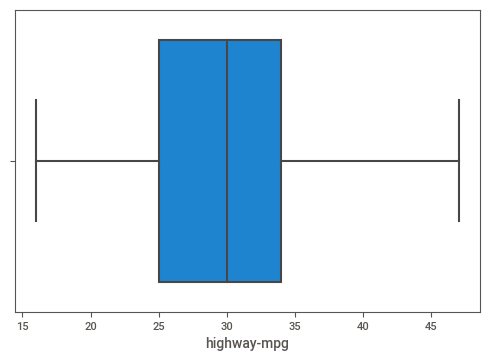

In [140]:
sns.boxplot(df['highway-mpg']);

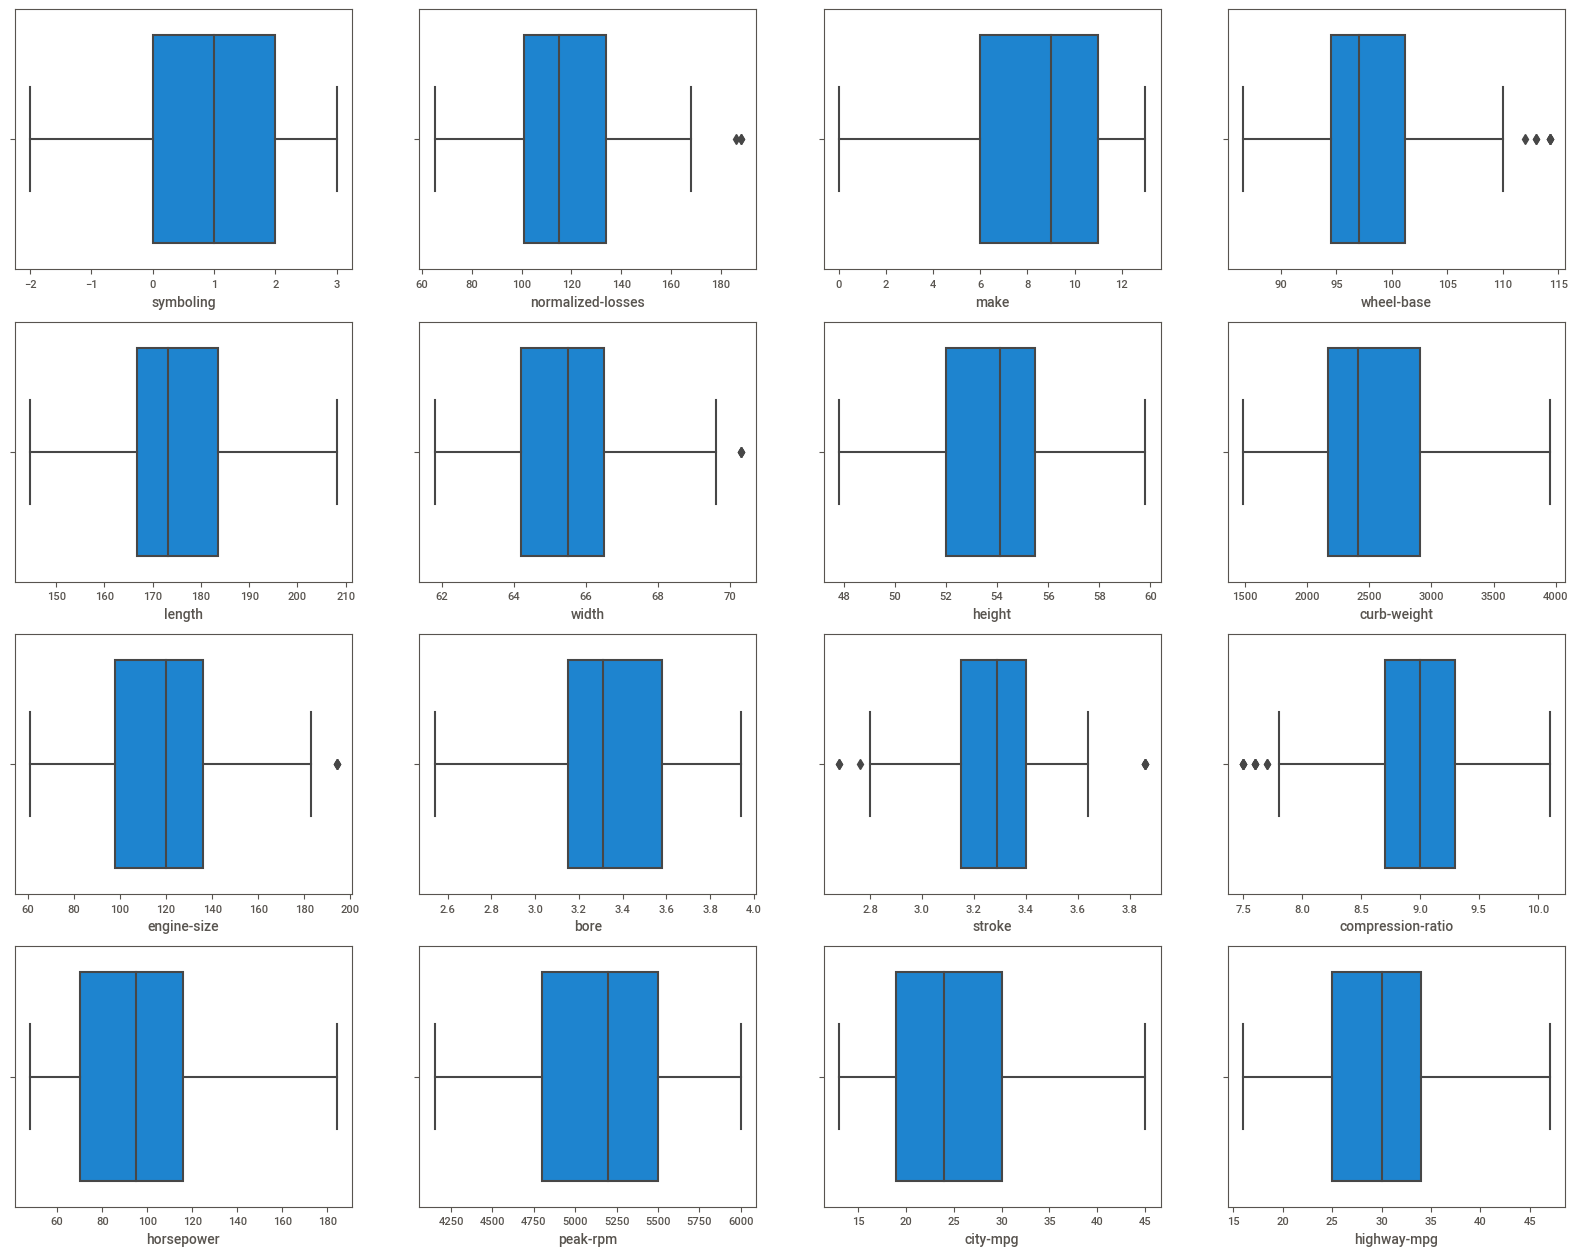

In [141]:
# rechecking for an outlier :
box=df[['symboling', 'normalized-losses', 'make', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=20: 
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

## Method used to handel an outlier :
* we used Inter Quartile Range (IQR) for handeling an outliers.
* As we can see that in the rechecking we are getting another outliers but we do not need to handle those because these datapoints were in the IQR prior handeling the Outlier.


In [142]:
df.to_csv('AUTO_PRICE_OUTLIER_HANDLED.csv')

### * In this step we successfully handled the outliers present in the 11 independent features.

## Checking for correlated features :

<AxesSubplot:>

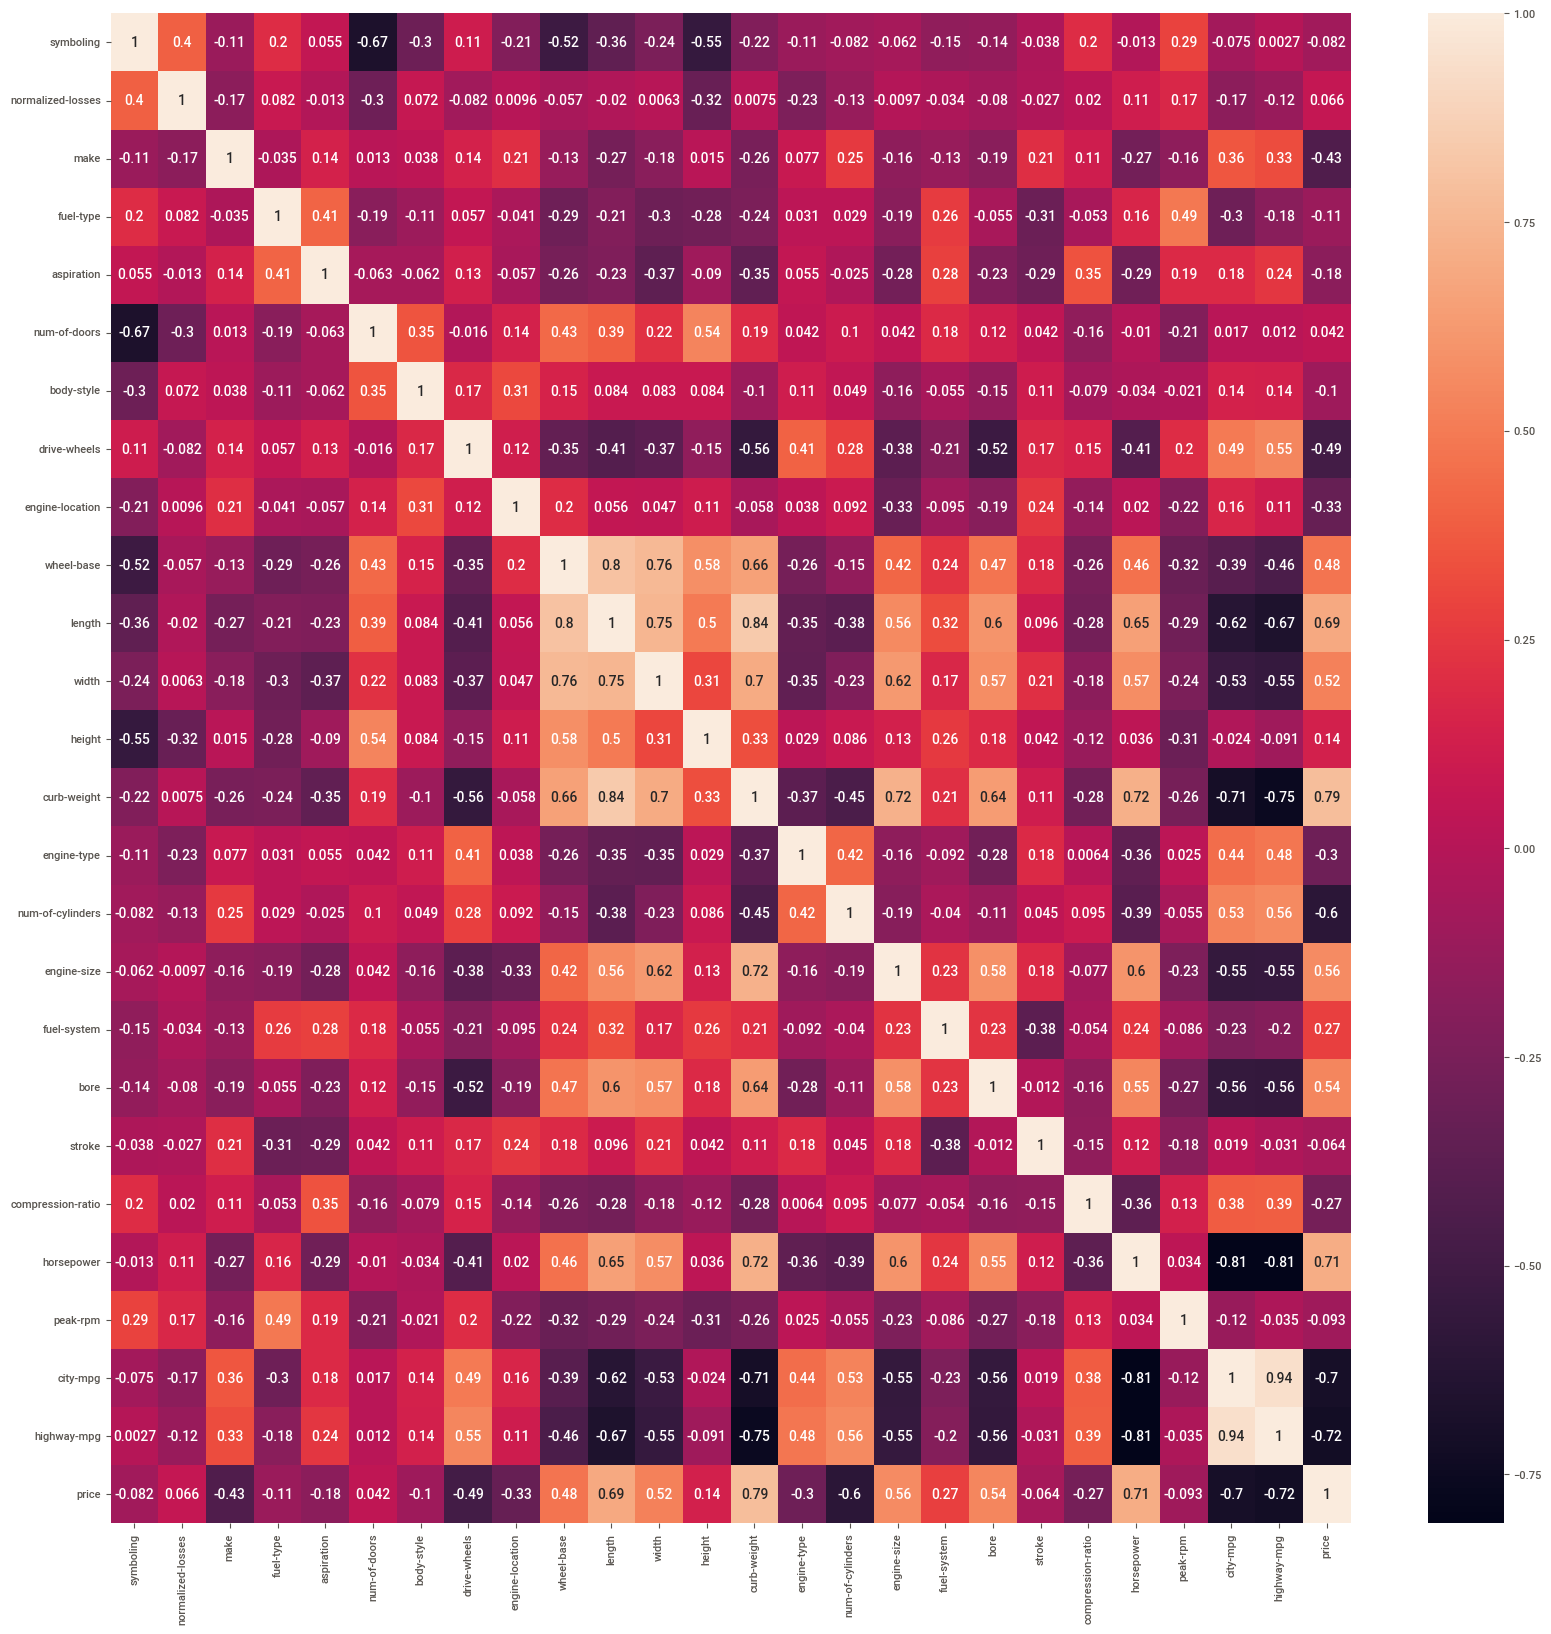

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [144]:
# creating DataFrame of correlated features:
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>=0.9]
corrmat = corrmat[corrmat<1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1     feature2      corr
0  highway-mpg     city-mpg  0.938527
1     city-mpg  highway-mpg  0.938527

* Here we have 2 correlated features which are highway-mpg & city-mpg we will be droping one of these features from the dataset.

In [145]:
# Dropping'fuel-type' and 'city=mpg'
df.drop(df[['city-mpg']],axis=1,inplace=True)

In [146]:
# Rechecking for any other correlated features:
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>=0.9]
corrmat = corrmat[corrmat<1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

* We can see that there is no correlated features in the dataset now, we are ready to go further step.

In [147]:
df.head()

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          3              115.0     2        1.0         1.0             0   
1          3              115.0     2        1.0         1.0             0   
2          1              115.0     2        1.0         1.0             0   
3          2              164.0     4        1.0         1.0             1   
4          2              164.0     4        1.0         1.0             1   

   body-style  drive-wheels  engine-location  wheel-base  length  width  \
0           0           1.0              1.0        88.6   168.8   64.1   
1           0           1.0              1.0        88.6   168.8   64.1   
2           3           1.0              1.0        94.5   171.2   65.5   
3           4           2.0              1.0        99.8   176.6   66.2   
4           4           0.0              1.0        99.4   176.6   66.4   

   height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0    48.8         2548          1.0               4.0          130   
1    48.8         2548          1.0               4.0          130   
2    52.4         2823          2.0               3.0          152   
3    54.3         2337          4.0               4.0          109   
4    54.3         2824          4.0               2.0          136   

   fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          6.0  3.47    2.68                9.0       111.0    5000.0   
1          6.0  3.47    2.68                9.0       111.0    5000.0   
2          6.0  2.68    3.47                9.0       154.0    5000.0   
3          6.0  3.19    3.40               10.0       102.0    5500.0   
4          6.0  3.19    3.40                8.0       115.0    5500.0   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

In [148]:
df.shape

(201, 25)

In [149]:
df.to_csv('auto_price_predict_XGBoost_NEW.csv')

* As we are using XGBoost algorithm we do not need to scale the data.

## Model Creation :

In [150]:
#Loading Dataset:
df = pd.read_csv('auto_price_predict_XGBoost_NEW.csv')
df.drop(df[['Unnamed: 0']],axis=1,inplace=True)
df.head(3)

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          3              115.0     2        1.0         1.0             0   
1          3              115.0     2        1.0         1.0             0   
2          1              115.0     2        1.0         1.0             0   

   body-style  drive-wheels  engine-location  wheel-base  length  width  \
0           0           1.0              1.0        88.6   168.8   64.1   
1           0           1.0              1.0        88.6   168.8   64.1   
2           3           1.0              1.0        94.5   171.2   65.5   

   height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0    48.8         2548          1.0               4.0          130   
1    48.8         2548          1.0               4.0          130   
2    52.4         2823          2.0               3.0          152   

   fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          6.0  3.47    2.68                9.0       111.0    5000.0   
1          6.0  3.47    2.68                9.0       111.0    5000.0   
2          6.0  2.68    3.47                9.0       154.0    5000.0   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500

In [151]:
# Splitting the data into training and testing:
from sklearn.model_selection import train_test_split
X = df.drop(['price'],axis=1)
y = df['price']
# Train and Test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.30, random_state=50)


In [152]:
# creating the model. 
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [153]:
# checking the performance of the model.
from sklearn.metrics import r2_score 
XGB2=XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,
                   min_child_weight=3)
XGB2.fit(X_train, y_train)
y_predict= XGB2.predict(X_train)


In [154]:
# checking shape of X.
X.shape

(201, 24)

In [155]:
# Checking r2_score for Training.
cc_train=r2_score(y_train,y_predict)
print('Training r2_score is :',cc_train)

Training r2_score is : 0.999220933275905


In [156]:
X_train.shape

(140, 24)

In [157]:
# Checking Adjusted r2_score for Training.
train_adjusted_r2= 1-(1-0.99)*(140-1)/(140-24-1)
print('Training Adjusted r2_score is :',train_adjusted_r2)

Training Adjusted r2_score is : 0.9879130434782608


In [158]:
# Predicting on the testing data.
y_hat=XGB2.predict(X_test)

In [159]:
# Checking r2_score for Testing.
cc_test=r2_score(y_test,y_hat)
print('Testing r2_score is :',cc_test )

Testing r2_score is : 0.9089277806029247


In [160]:
# Checking shape for X_test.
X_test.shape

(61, 24)

In [161]:
# Checking Adjusted r2_score.
test_adjusted_r2= 1-(1-0.90)*(61-1)/(61-24-1)
print('Testing Adjusted r2_score is :',test_adjusted_r2)

Testing Adjusted r2_score is : 0.8333333333333334


In [162]:
from sklearn.metrics import mean_squared_error
import math
print('Mean Squared Error is :',mean_squared_error(y_test,y_hat))
print('square_root of Mean Squared Error is :',math.sqrt(mean_squared_error(y_test,y_hat)))

Mean Squared Error is : 5333682.4603121085
square_root of Mean Squared Error is : 2309.4766637297093


# Hyperparameter Tunning:

In [163]:
# Using RandomSearchCV for hyperparameter tunning.
from sklearn.model_selection import RandomizedSearchCV 

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=50,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='r2',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=50, n_jobs=-1)
                               

                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 6.4, 'n_estimators': 130, 'max_depth': 9, 'learning_rate': 0.4, 'gamma': 1.6})


## Creating new model with Hyperparameter tunned.

In [164]:
# Model creation.
xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=3,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1.5,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, ...)

In [165]:
print("Training score:",xgb_model.score(X_train,y_train), "Test Score:",xgb_model.score(X_test,y_test))

Training score: 0.9995380473173989 Test Score: 0.9400171456600072


#### Note : We have manually changed the value to generalize the model and avoid overfitting.

In [166]:
X_train.shape

(140, 24)

In [167]:
# Checking Adjusted r2_score for train.
train_adjusted_r2= 1-(1-0.99)*(140-1)/(140-24-1)
print('Training Adjusted r2_score is :',train_adjusted_r2)

Training Adjusted r2_score is : 0.9879130434782608


In [168]:
X_test.shape

(61, 24)

In [169]:
# Checking Adjusted r2_score for test.
test_adjusted_r2= 1-(1-0.93)*(61-1)/(61-24-1)
print('Testing Adjusted r2_score is :',test_adjusted_r2)

Testing Adjusted r2_score is : 0.8833333333333334


# Conclusion :

### Bussiness case :
* To predict the automobile price.

### Type of bussiness case :
* Regression where we have to predict the continuous value which wes price(Target variable).

### Challenge : 
* Data had missing values in the form of Question Mark ('?')
* Data was not labeled.
* Around 70% of the data had an Outliers.
* Size of the dataset was small.
* Dataset had more of the categorical values.(Which were handled by manual encoding.)
* Simple algorithms were not performing good like linear regression.

### How challenges got handled :
1. By doing data transformation.
2. Handeling missing values, categorical features, and outliers.
3. Tried different ML Algorithm in order to see which performs good and generalize better.

### Evaluation metrics used :
1. r2 score
2. Adjusted r2 score
3. mean squared error
4. root mean square error

### Algorithm Used :
* XGBoost Regresssor 

### Reason for using XGBoost:
1. Robust with Outlier.
2. scale data was not required.
3. Easy to regularize.
4. Easy to tune Hyperparameter.

### Disadvantage:
* XGBoost tends to overfit.
#### we solved this problem with hyperparameter tunning.